To build a model that shows the variations in the housing price along with the variables

**Steps to create a model are as follows:**


1.  Read and understand the data
2.  Preparing the data for modelling (split the train and test data to build a model)
3. Training the model
4. Residual analysis
5. Prediction and evaluation on the test data





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read and understand the data**

In [ ]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [ ]:
# import Housing.csv
housing = pd.read_csv('/content/drive/MyDrive/train.csv')
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
# number of observations 
len(housing.index)

1460

In [ ]:
housing.shape

(1460, 81)

In [ ]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
#check the nulls
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
print(housing.duplicated().sum()) #to check duplicacy in dataset

0


In [ ]:
round(housing.isnull().sum()/len(housing.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

Deleting the columns with missing values more then 10%

In [ ]:
round(housing.isnull().sum()/len(housing.index),2)[round(housing.isnull().sum()/len(housing.index),2).values > 0.10]


LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [ ]:
housing = housing.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis = 1)

In [ ]:
#housing=Housing

In [ ]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

Calculating the age of the houses by date conversions

In [ ]:
housing['YearBuilt_Old'] = housing.YearBuilt.max()-housing.YearBuilt
housing['YearRemodAdd_Old'] = housing.YearRemodAdd.max()-housing.YearRemodAdd
housing['GarageYrBlt_Old'] = housing.GarageYrBlt.max()-housing.GarageYrBlt
housing['YrSold_Old'] = housing.YrSold.max()-housing.YrSold
housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  YearBuilt_Old  \
77         1948          2001       1948.0    2008             62   
86         2005          2005       2005.0    2009              5   
1004       2005          2006       2005.0    2009              5   
1143       1959          1959          NaN    2008             51   
1387       1916          1950       1916.0    2007             94   
656        1959          2006       1959.0    2008             51   
384        1992          1992       1992.0    2007             18   
920        1994          1994       1994.0    2007             16   
527        2008          2008       2008.0    2008              2   
619        2003          2003       2003.0    2008              7   

      YearRemodAdd_Old  GarageYrBlt_Old  YrSold_Old  
77                   9             62.0           2  
86                   5              5.0           1  
1004                 4              5.0           1  
1143                51              NaN           2  
1387                60             94.0           3  
656                  4             51.0           2  
384                 18             18.0           3  
920                 16             16.0           3  
527                  2              2.0           2  
619                  7              7.0           2

dropping extra year columns

In [ ]:
housing = housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

Handling missing values

In [ ]:
round(housing.isnull().sum()/len(housing.index),2)[round(housing.isnull().sum()/len(housing.index),2).values > 0.00]


MasVnrType         0.01
MasVnrArea         0.01
BsmtQual           0.03
BsmtCond           0.03
BsmtExposure       0.03
BsmtFinType1       0.03
BsmtFinType2       0.03
GarageType         0.06
GarageFinish       0.06
GarageQual         0.06
GarageCond         0.06
GarageYrBlt_Old    0.06
dtype: float64

In [ ]:
housing.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [ ]:
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
housing.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [ ]:
housing.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [ ]:
housing.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [ ]:
housing.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [ ]:
housing.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
housing.GarageYrBlt_Old.value_counts()

5.0      65
4.0      59
6.0      53
7.0      50
3.0      49
33.0     35
12.0     31
11.0     30
34.0     29
2.0      29
10.0     27
42.0     26
8.0      26
60.0     24
17.0     22
52.0     21
44.0     21
1.0      21
48.0     21
45.0     21
40.0     20
14.0     20
53.0     20
9.0      20
32.0     19
56.0     19
50.0     19
13.0     19
36.0     18
46.0     18
16.0     18
15.0     18
51.0     17
54.0     16
47.0     16
20.0     16
30.0     15
31.0     15
41.0     15
43.0     15
37.0     14
22.0     14
90.0     14
38.0     14
70.0     14
18.0     13
49.0     13
39.0     13
55.0     13
57.0     12
62.0     11
23.0     11
85.0     10
25.0     10
29.0     10
21.0     10
69.0     10
35.0      9
19.0      9
71.0      9
80.0      8
26.0      8
61.0      8
27.0      7
84.0      6
24.0      6
59.0      6
74.0      5
94.0      5
88.0      5
75.0      4
64.0      4
82.0      4
79.0      4
28.0      4
65.0      4
100.0     3
0.0       3
78.0      3
58.0      3
72.0      3
89.0      3
86.0      3
87.0

In [ ]:
housing.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [ ]:
housing.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [ ]:
housing.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
#imputing values with mode values from the above mode values
housing.MasVnrType.fillna('None',inplace=True)
housing.MasVnrArea.fillna(housing.MasVnrArea.mean(),inplace=True)
housing.BsmtQual.fillna('TA',inplace=True)
housing.BsmtCond.fillna('TA',inplace=True)
housing.BsmtExposure.fillna('No',inplace=True)
housing.BsmtFinType1.fillna('Unf',inplace=True)
housing.BsmtFinType2.fillna('Unf',inplace=True)
housing.GarageType.fillna('Attchd',inplace=True)
housing.GarageYrBlt_Old.fillna(-1,inplace=True)
housing.GarageFinish.fillna('Unf',inplace=True)
housing.GarageQual.fillna('TA',inplace=True)
housing.GarageCond.fillna('TA',inplace=True)

#### As per the analysis 'Street' & 'Utilities' is explaining the lowest variance hence dropping these columns

In [ ]:
housing.Street.value_counts()
housing.Utilities.value_counts()
housing = housing.drop(['Street','Utilities'],axis='columns')

Dropping unncessary column ID

In [ ]:
housing = housing.drop('Id',axis='columns')

In [ ]:
housing[list(housing.dtypes[housing.dtypes!='object'].index)].describe()

MSSubClass        LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342   103.685262   
std      42.300571    9981.264932     1.382997     1.112799   180.569112   
min      20.000000    1300.000000     1.000000     1.000000     0.000000   
25%      20.000000    7553.500000     5.000000     5.000000     0.000000   
50%      50.000000    9478.500000     6.000000     5.000000     0.000000   
75%      70.000000   11601.500000     7.000000     6.000000   164.250000   
max     190.000000  215245.000000    10.000000     9.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014     1.767123   472.980137    94.244521    46.660274   
std       0.644666     0.747315   213.804841   125.338794    66.256028   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000   334.500000     0.000000     0.000000   
50%       1.000000     2.000000   480.000000     0.000000    25.000000   
75%       1.000000     2.000000   576.000000   168.000000    68.000000   
max       3.000000     4.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.758904     43.489041   
std        61.119149    29.317331    55.757415    40.177307    496.123024   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000   

In [ ]:
Continous_variables = list(housing.dtypes[housing.dtypes!='object'].index)
print(len(Continous_variables))

36


Univariate for Categorical variables

In [ ]:
#identify categorical variable and numerical variable
cat_var = list(housing.dtypes[housing.dtypes=='object'].index)
print(cat_var)
cat_var_xtick_rotation=[False,False,True,False,False,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True]



['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
len(housing.columns)

72

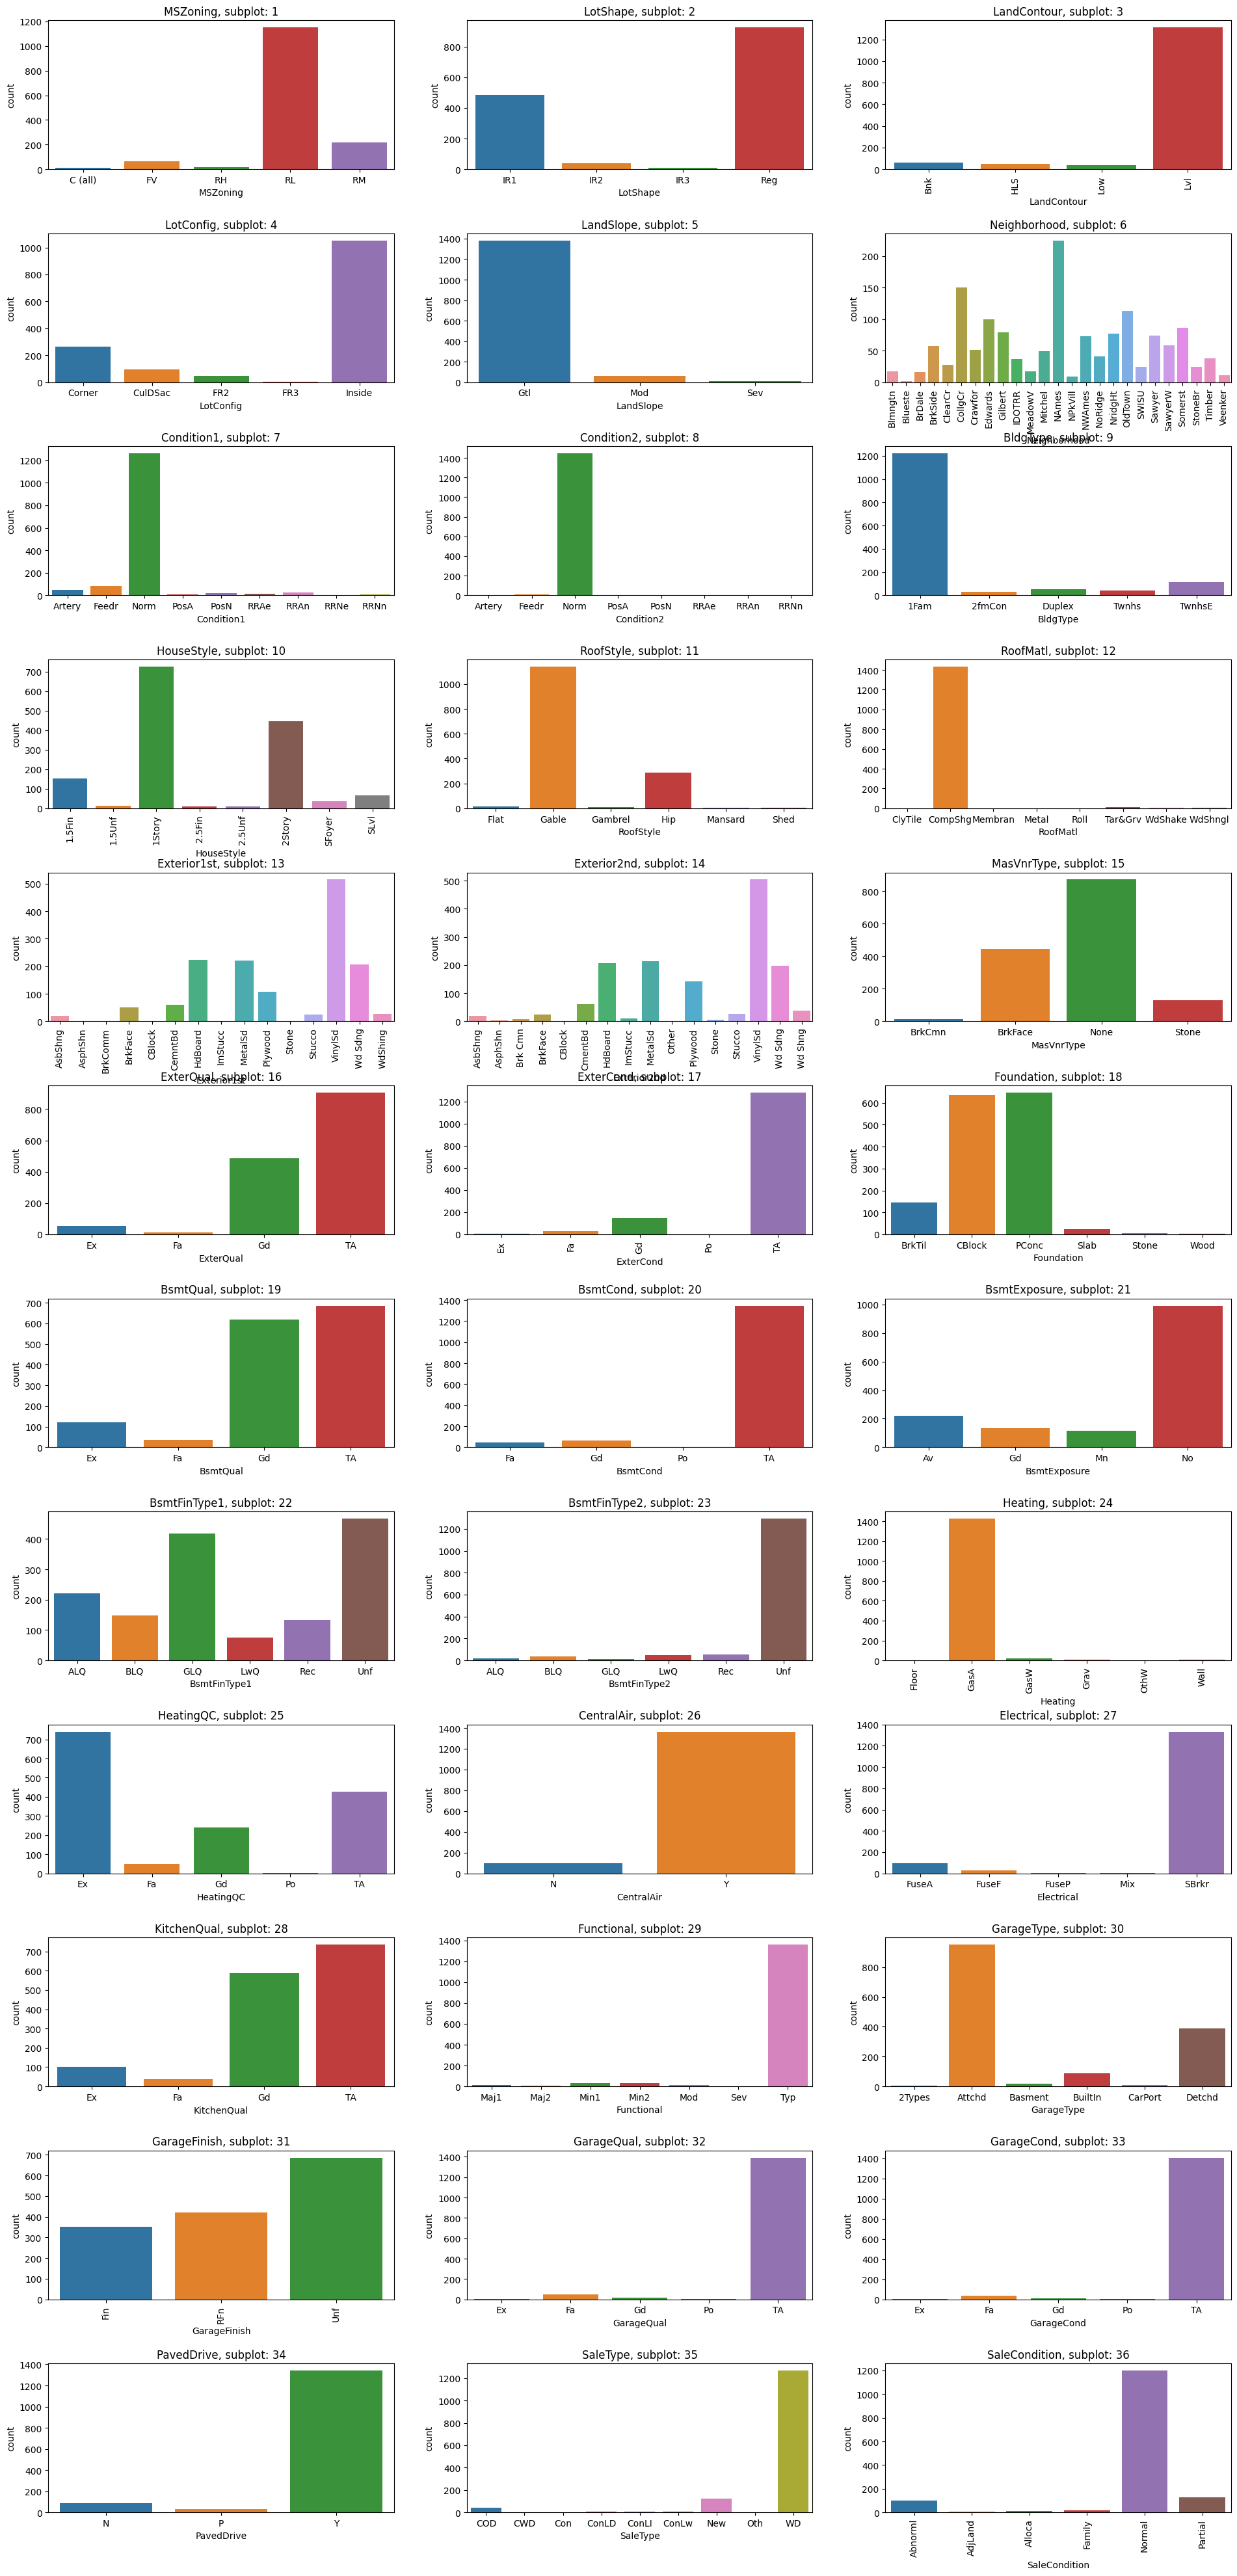

In [ ]:
a = 12 # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
k = 0  # initialize list counter

fig, ax=plt.subplots(a, b, figsize=(30,20))
fig.set_size_inches(20,40)
fig.tight_layout(pad=5)

for i in range(0,a):
    for j in range(0,b):
      if k<len(cat_var):
        ax[i][j].title.set_text('{}, subplot: {}'.format(cat_var[k], c))
        sns.countplot(data = housing.sort_values(by=cat_var[k]), 
              x=cat_var[k],ax=ax[i][j])
        if cat_var_xtick_rotation[k]:
            ax[i][j].tick_params('x', labelrotation=90)
      else:
        break
      c = c + 1
      k = k + 1
      
plt.show();

univariate Analysis on numerical

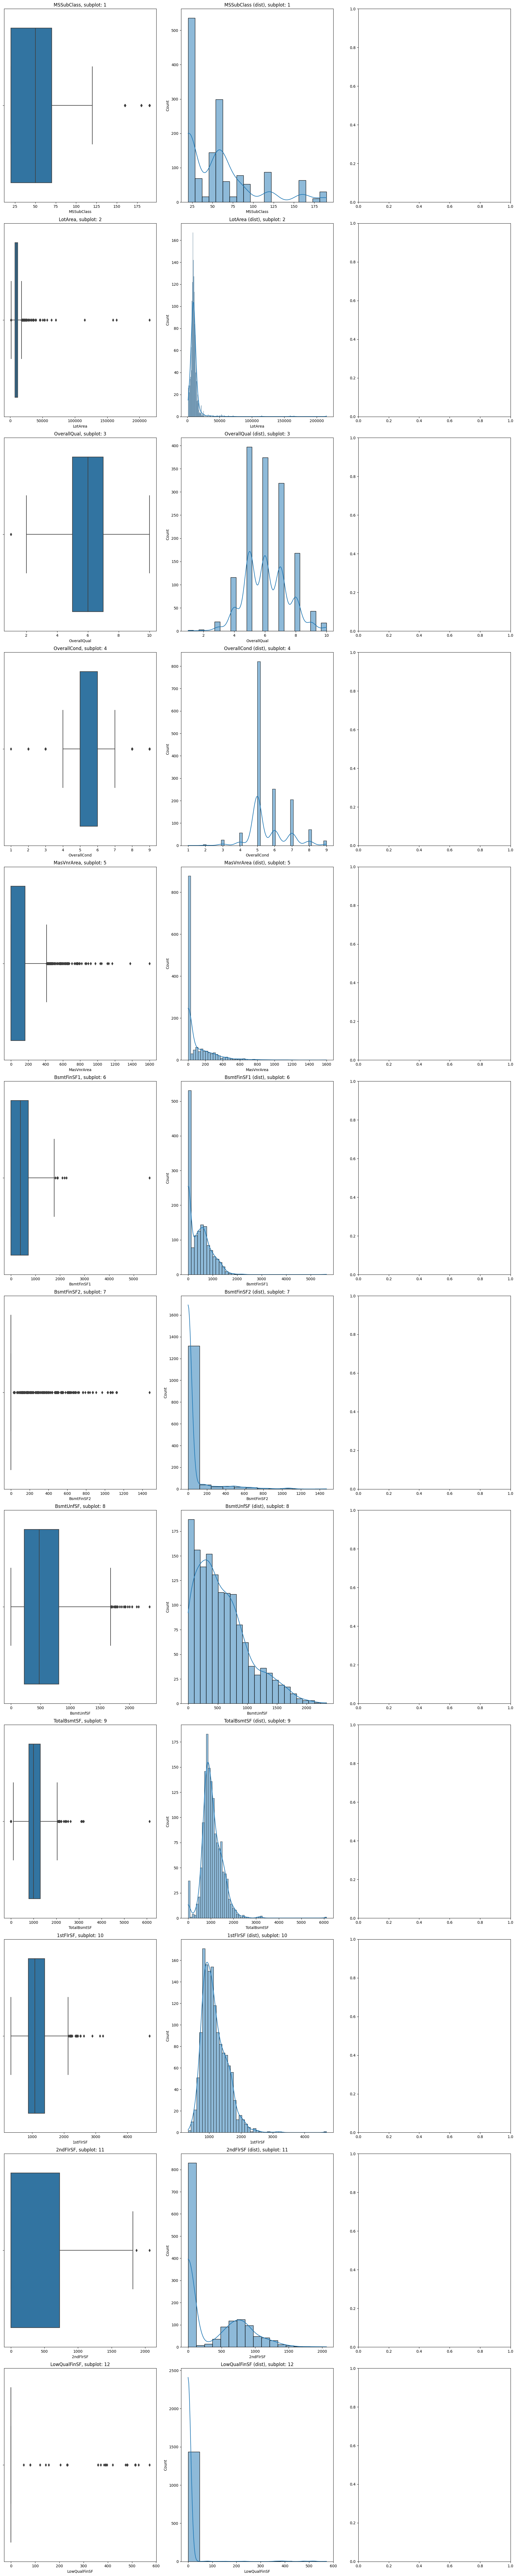

In [ ]:
# Plotting for num_col1
a = 12  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
k = 0  # initialize list counter

fig, ax=plt.subplots(a, b, figsize=(120,80))
fig.set_size_inches(20, 95)
fig.tight_layout(pad=3.5)


for i in range(0,a):
    if k<len(Continous_variables):
      ax[i][0].title.set_text('{}, subplot: {}'.format(Continous_variables[k], c))
      sns.boxplot(x=housing[Continous_variables[k]],ax=ax[i][0])

      ax[i][1].title.set_text('{} (dist), subplot: {}'.format(Continous_variables[k], c))
      sns.histplot(x=housing[Continous_variables[k]],ax=ax[i][1],kde=True)
    else:
      break

    c = c + 1
    k = k + 1

plt.show();

Visualize Numeric Variable with respect to target variable

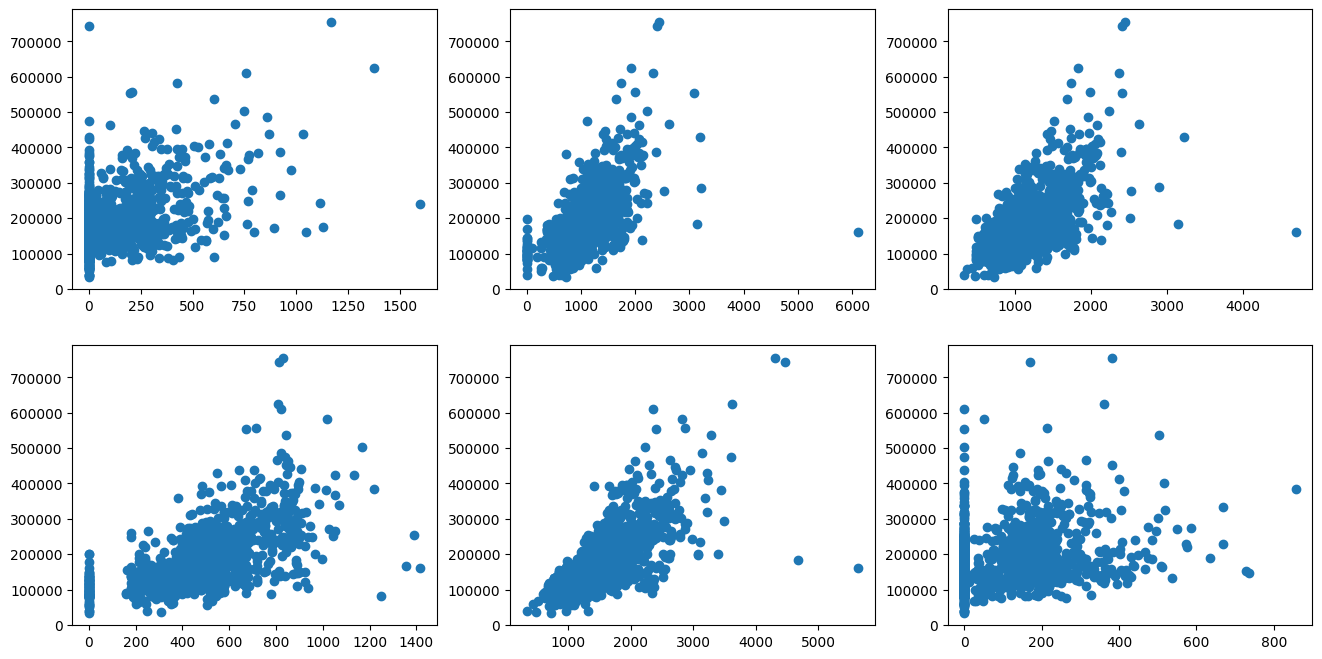

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(housing.MasVnrArea,housing.SalePrice)
plt.subplot(2,3,2)
plt.scatter(housing.TotalBsmtSF,housing.SalePrice)
plt.subplot(2,3,3)
plt.scatter(housing['1stFlrSF'],housing.SalePrice)
plt.subplot(2,3,4)
plt.scatter(housing['GarageArea'],housing.SalePrice)
plt.subplot(2,3,5)
plt.scatter(housing['GrLivArea'],housing.SalePrice)
plt.subplot(2,3,6)
plt.scatter(housing['WoodDeckSF'],housing.SalePrice)

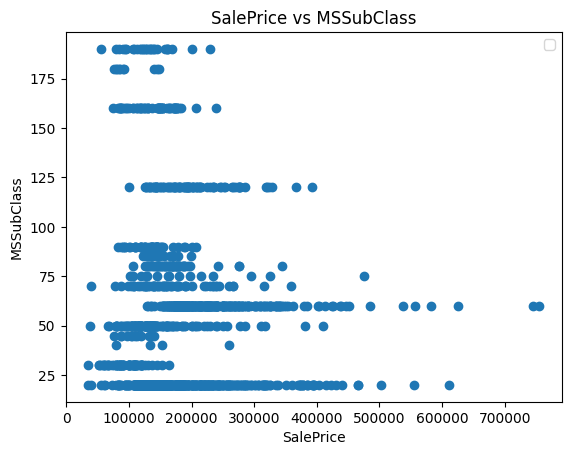

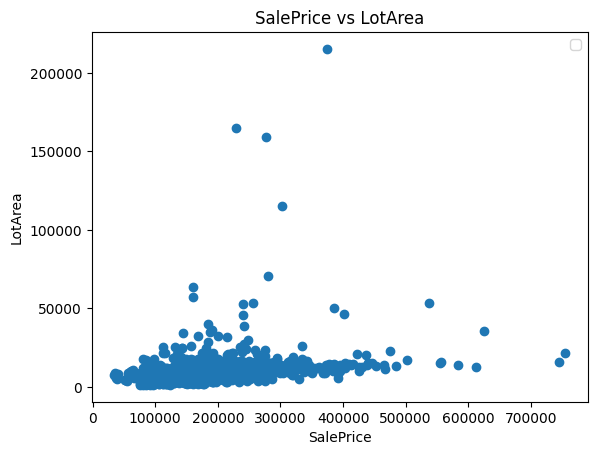

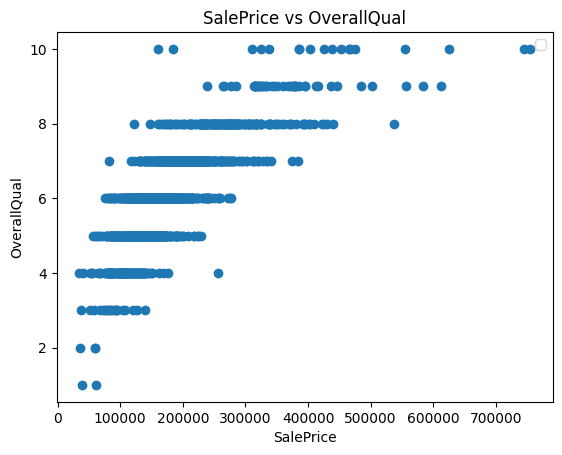

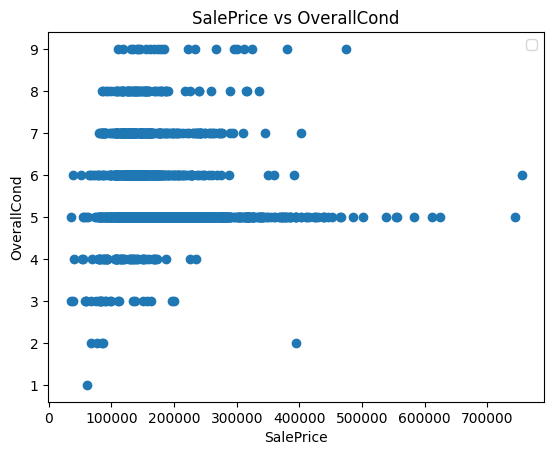

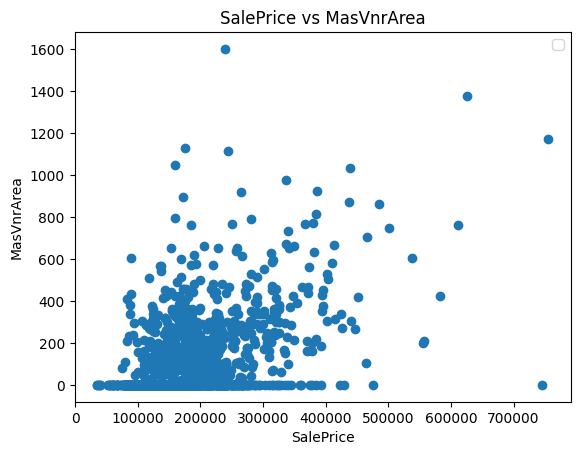

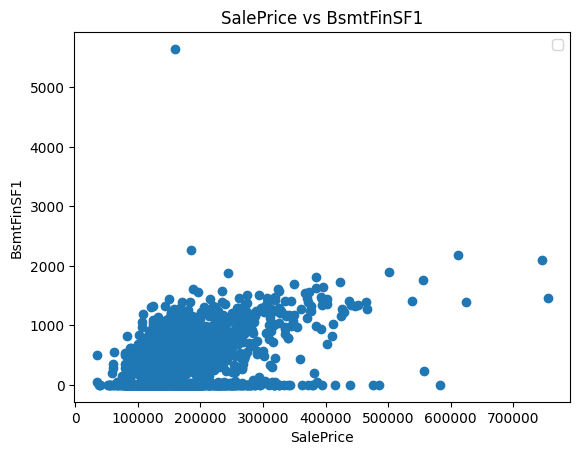

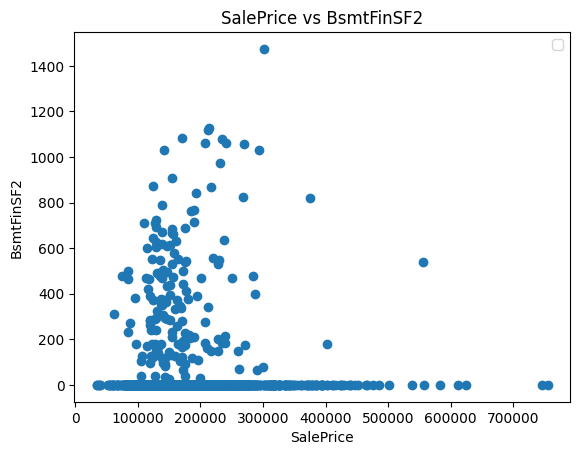

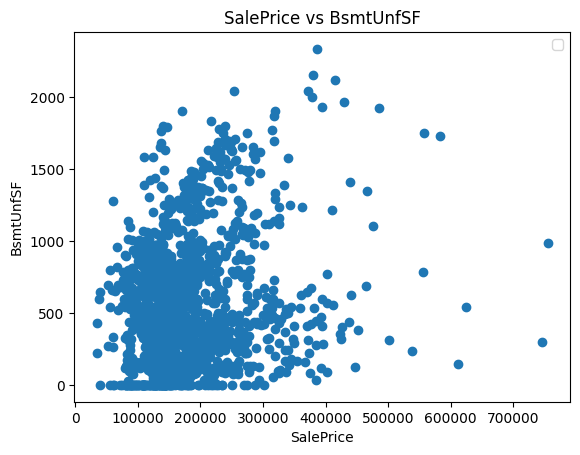

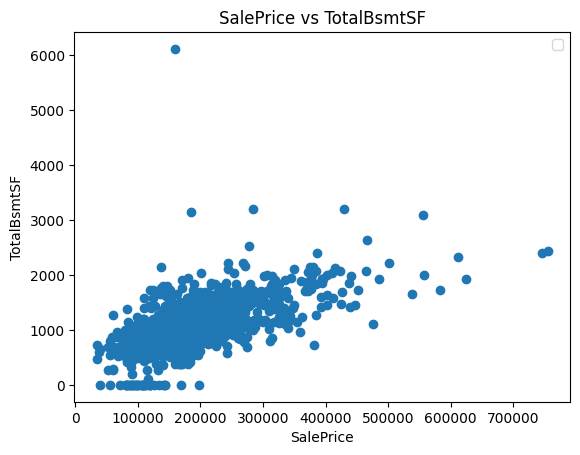

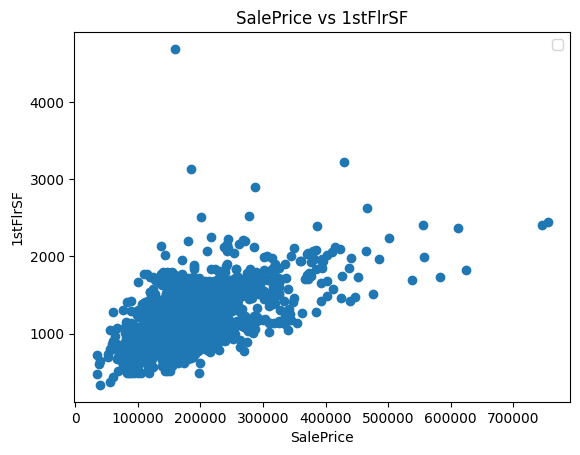

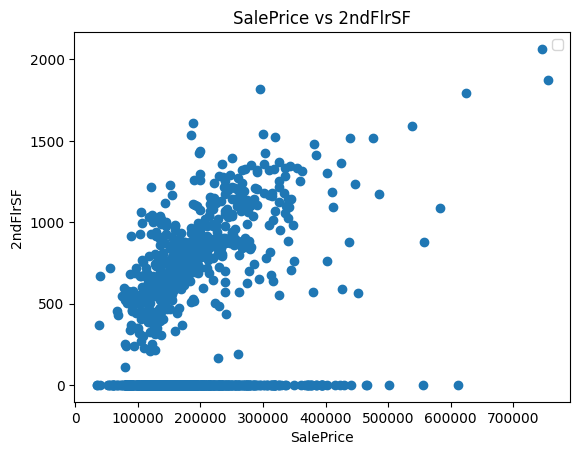

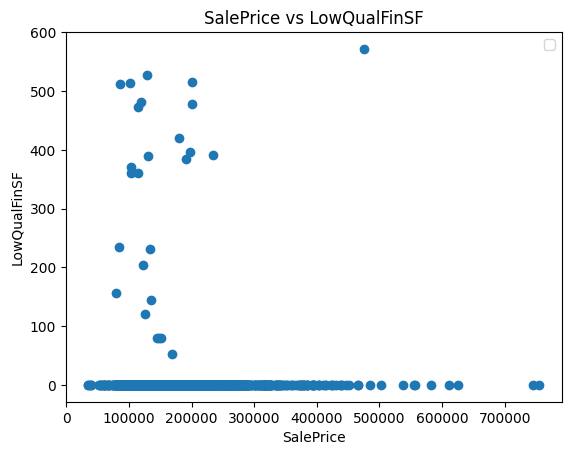

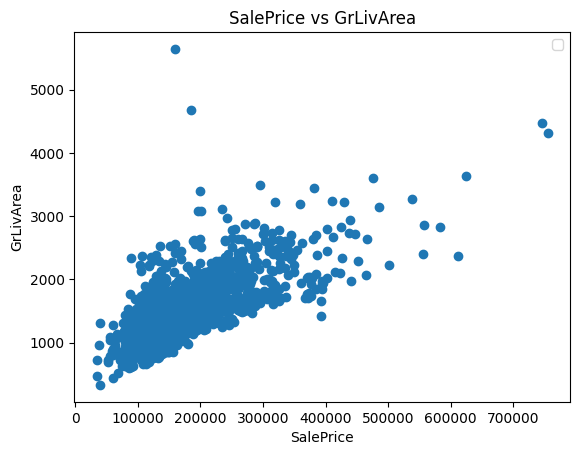

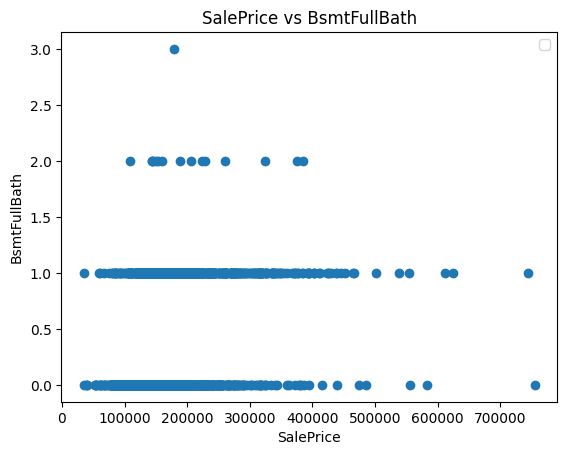

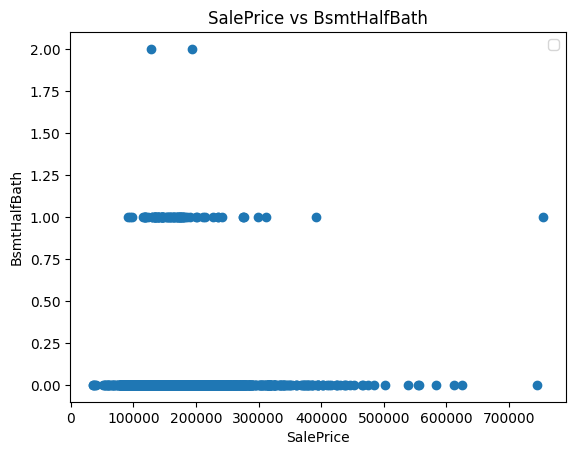

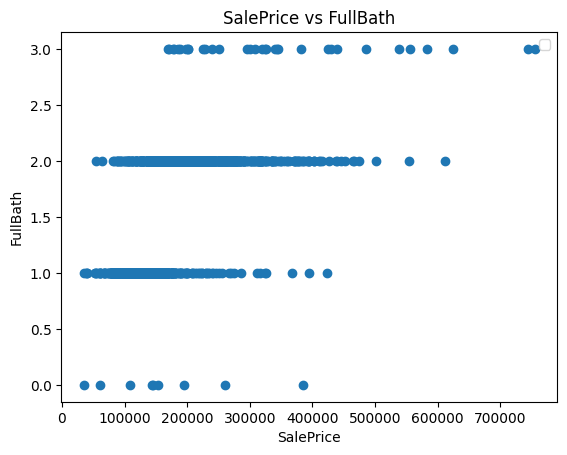

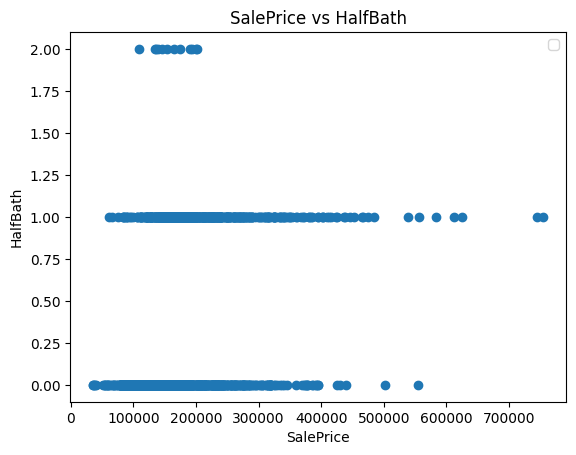

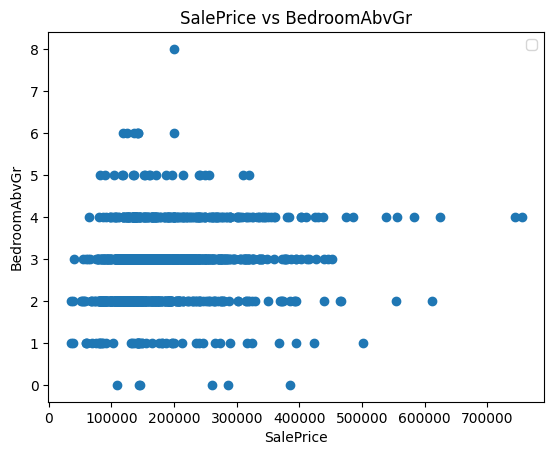

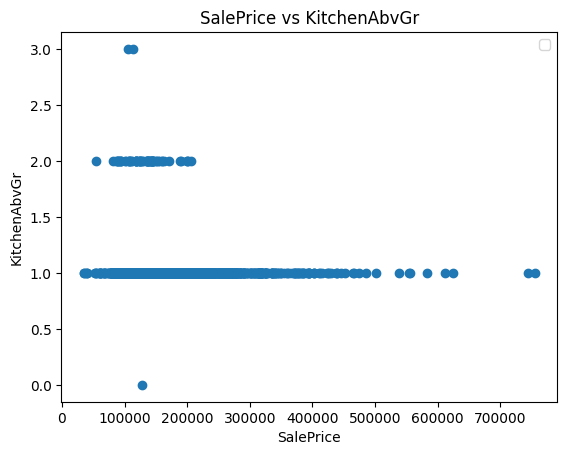

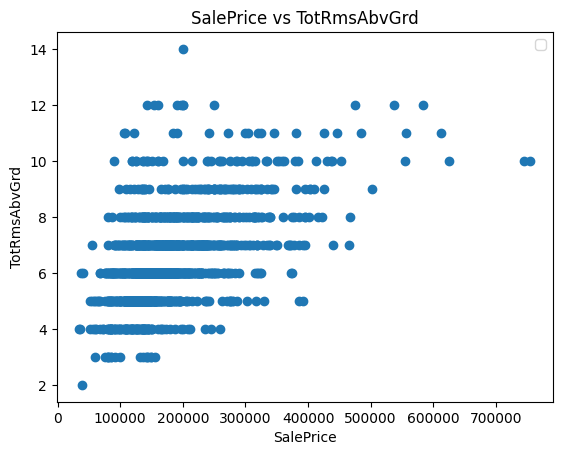

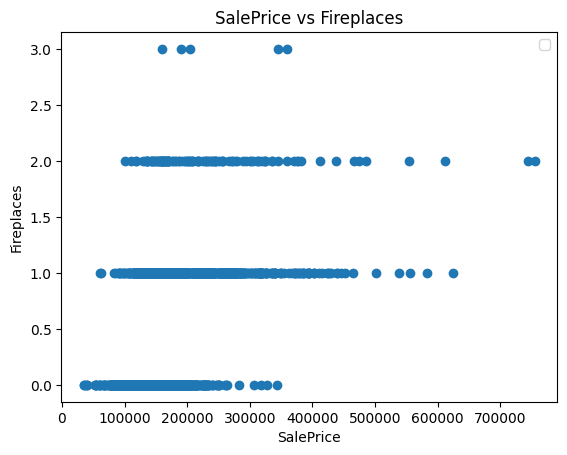

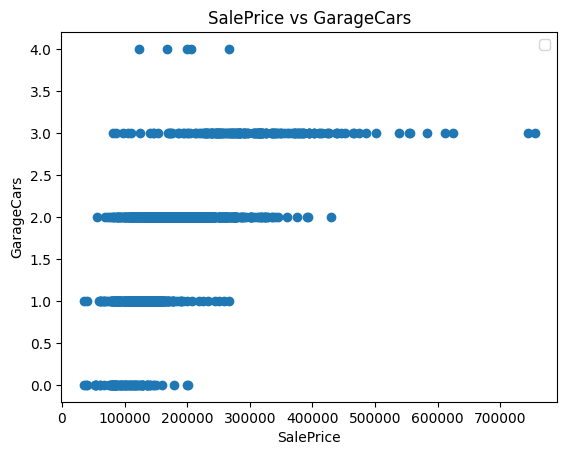

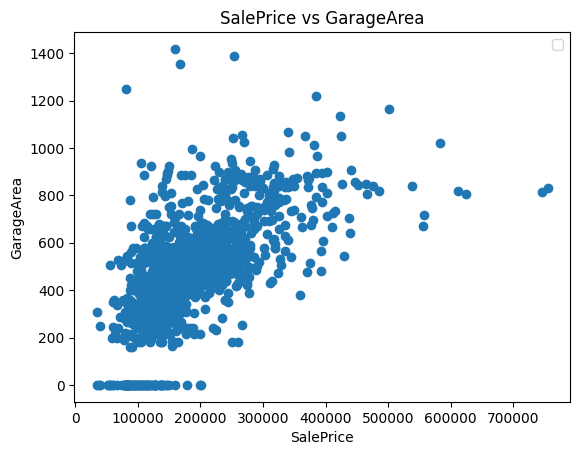

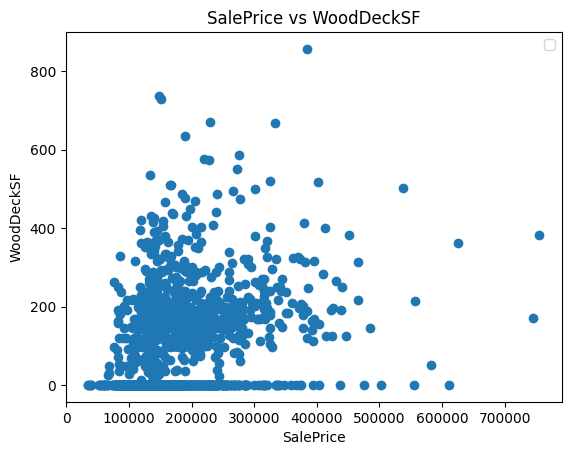

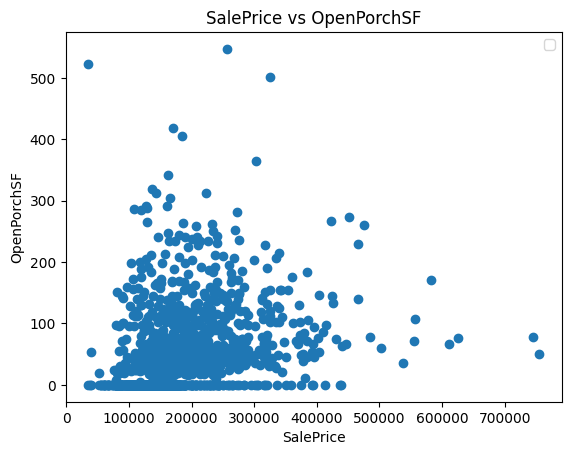

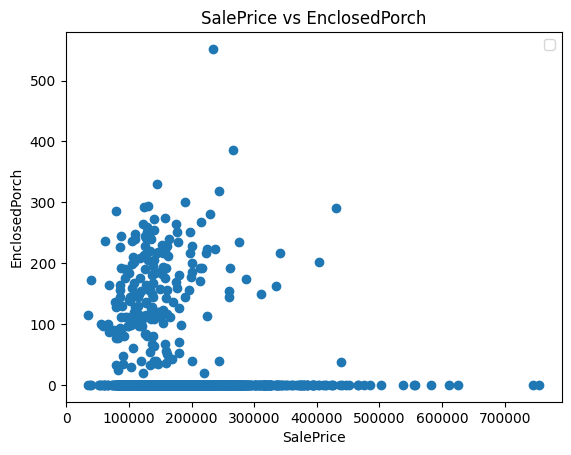

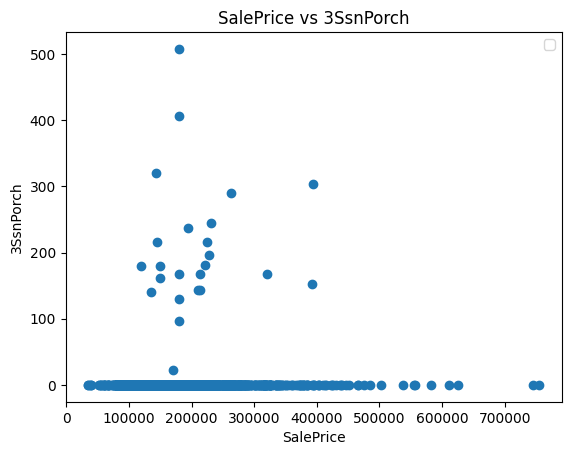

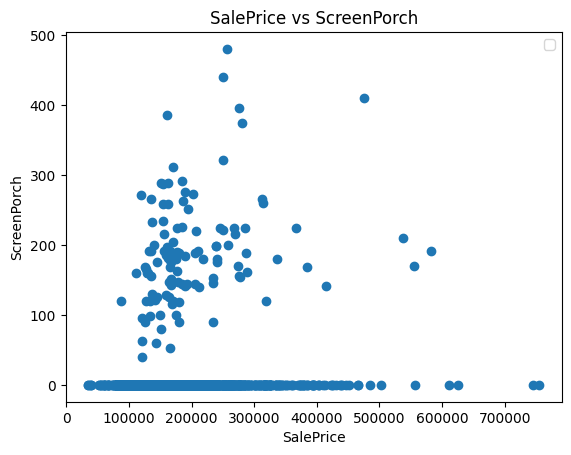

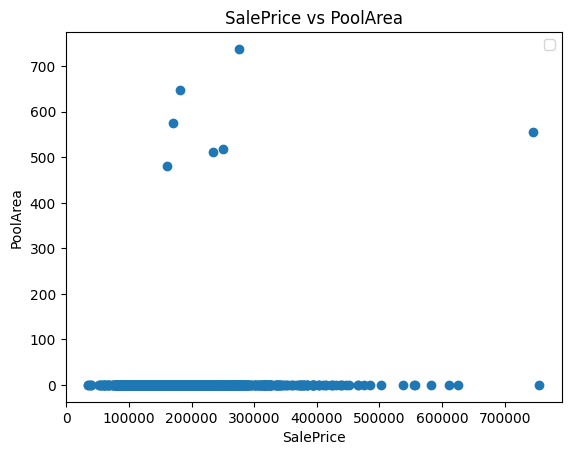

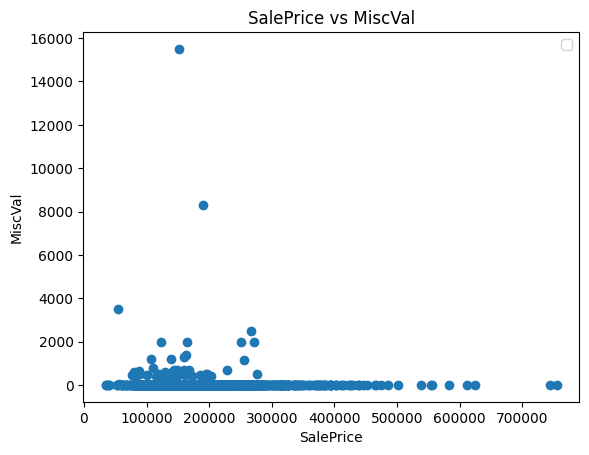

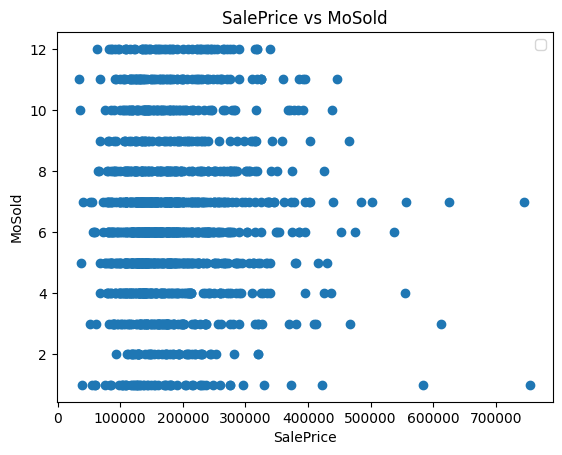

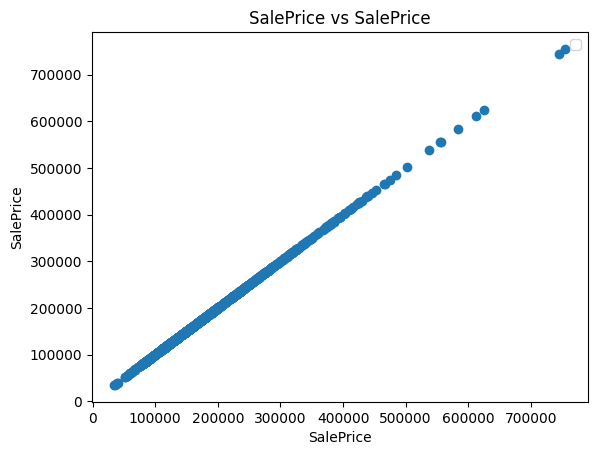

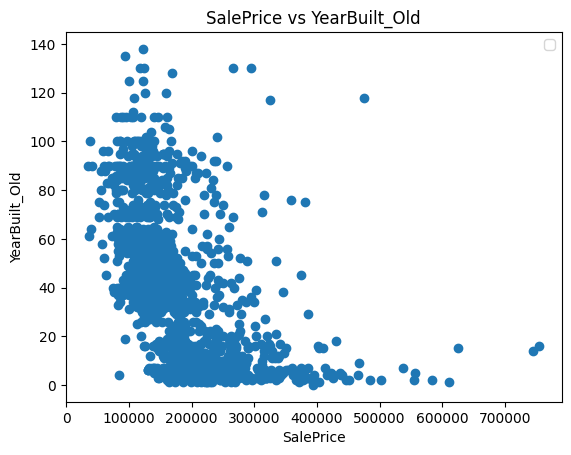

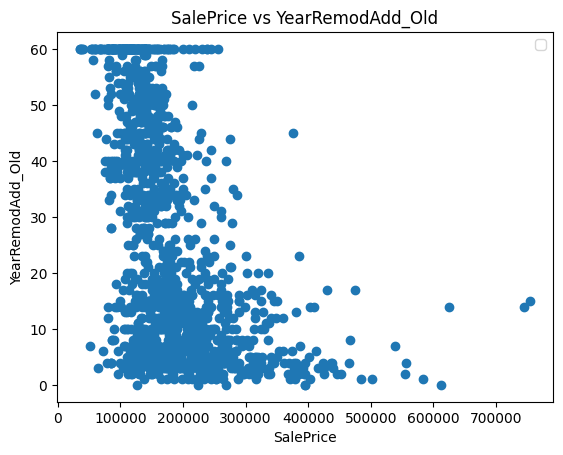

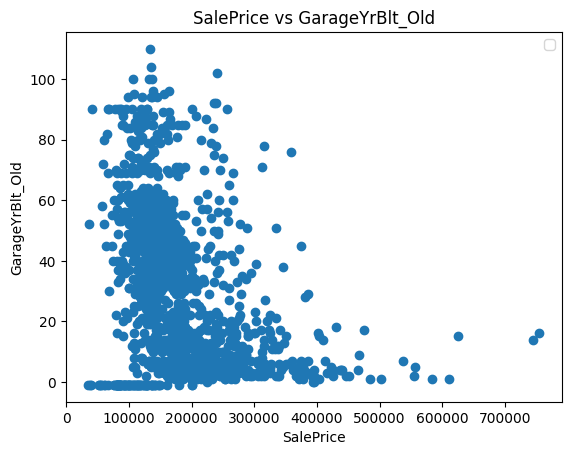

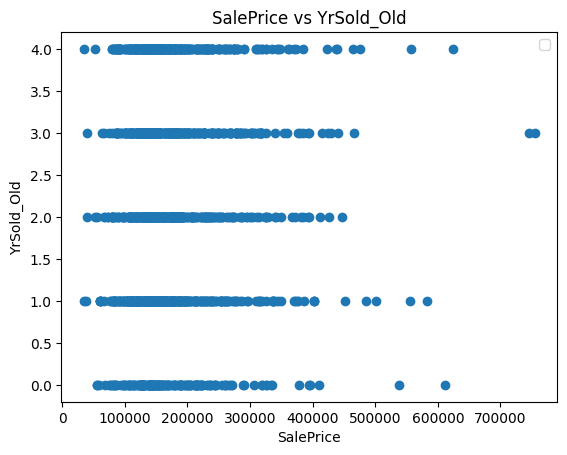

In [ ]:
x_col = "SalePrice"
y_columns = Continous_variables


for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(housing[x_col], housing[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.legend()
    plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[Continous_variables], figsize = (72,72 ))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Visualize categorical variables with resect to target variables


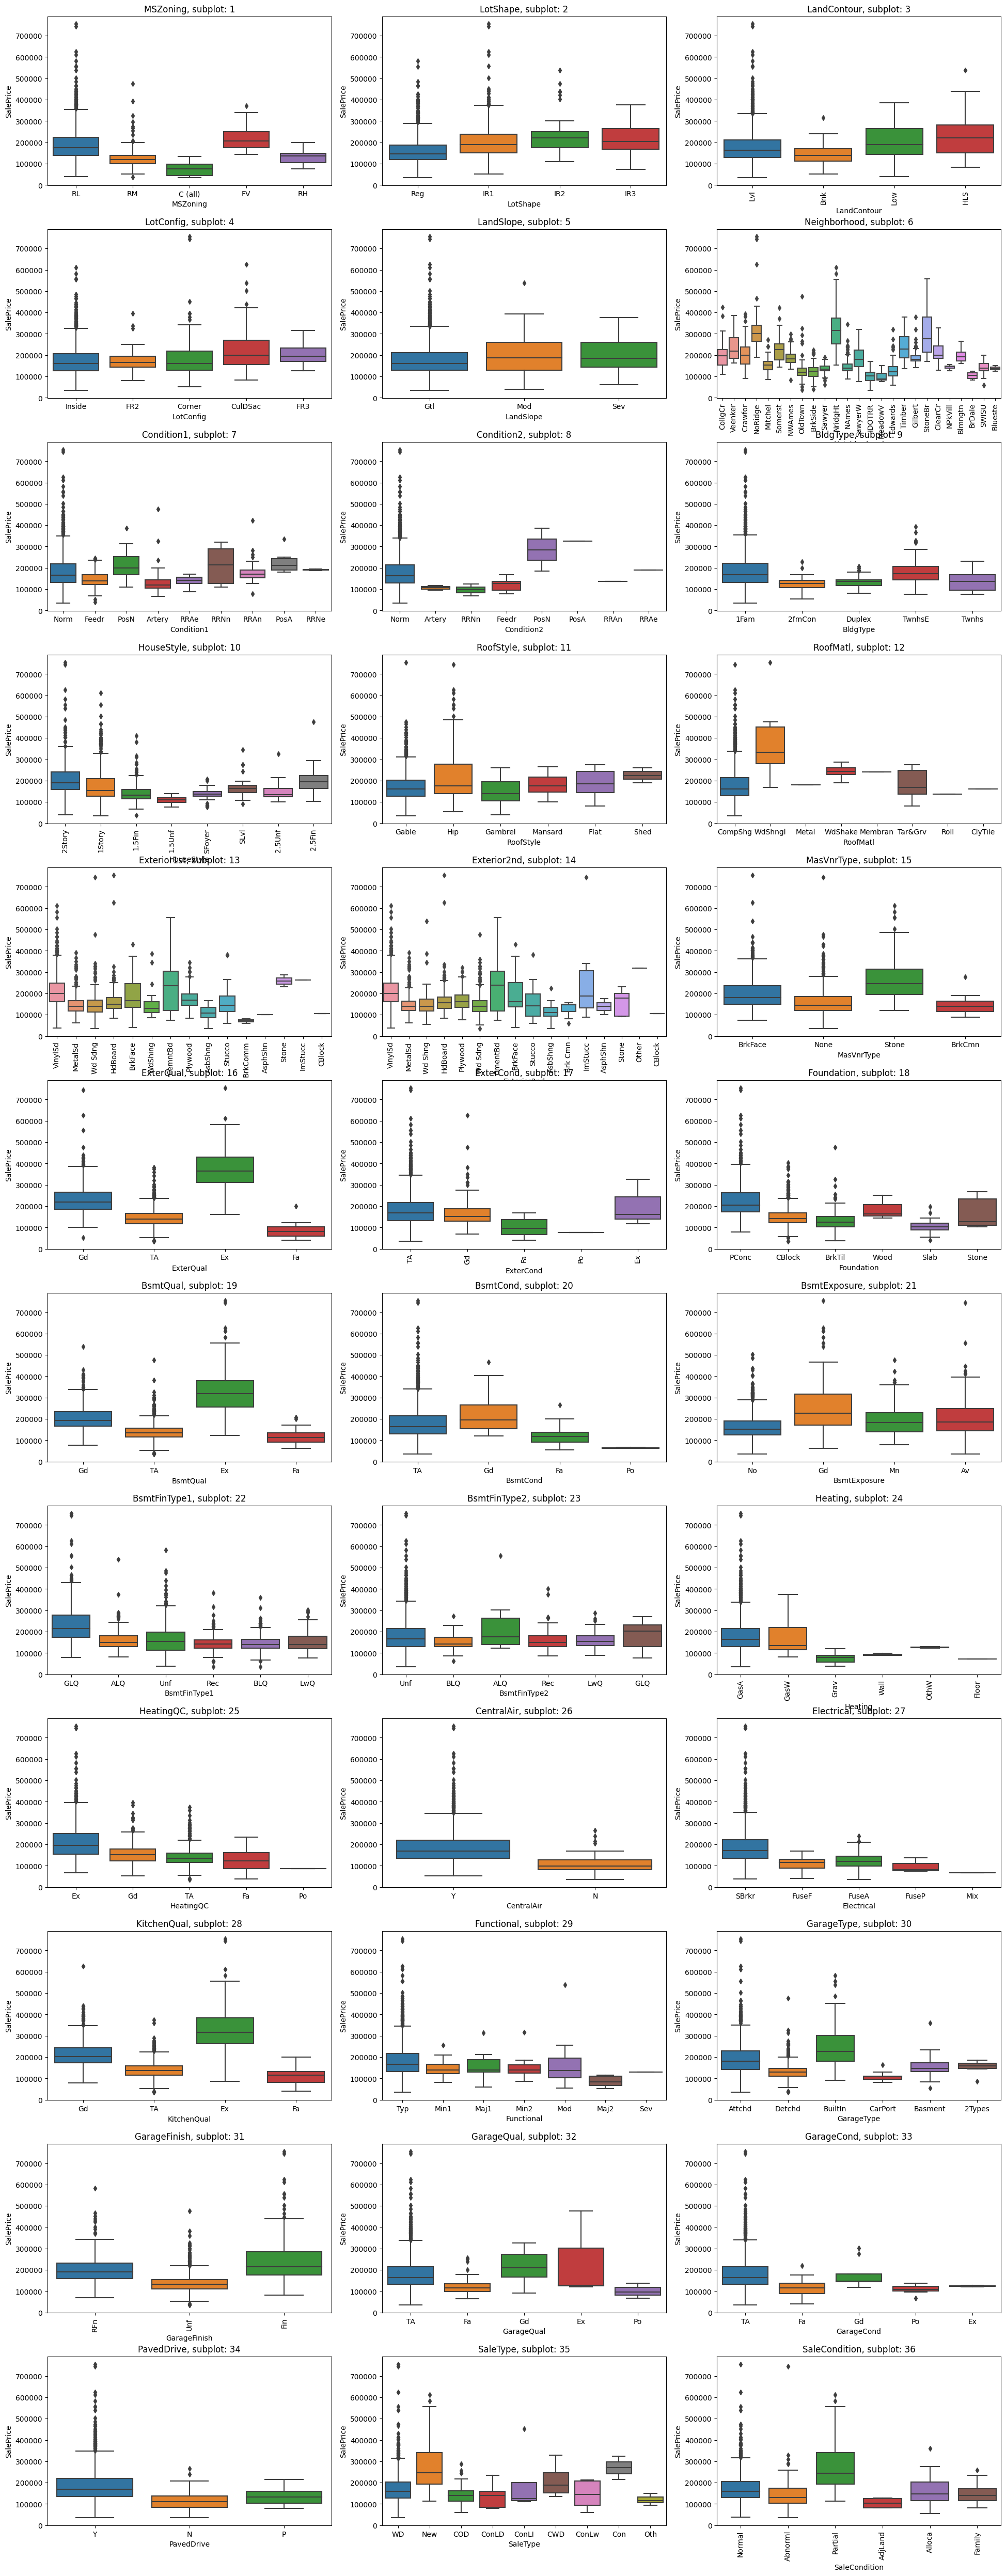

In [ ]:
# For num_col1
a = 12  # number of rows
b = 3 # number of columns
c = 1  # initialize plot counter
k = 0  # initialize list counter
target_variable = housing['SalePrice']
fig, ax=plt.subplots(a, b, figsize=(50,40))
fig.set_size_inches(20, 50)
fig.tight_layout(pad=4)

for i in range(0,a):
    for j in range(0,b):
      if k<len(cat_var):
        ax[i][j].title.set_text('{}, subplot: {}'.format(cat_var[k], c))
        #sns.boxplot(data=housing,x=target_variable,y=cat_var[k],orient="v",ax=ax[i][j])
        sns.boxplot(x= cat_var[k],y = target_variable,data = housing,ax=ax[i][j])
        if cat_var_xtick_rotation[k]:
            ax[i][j].tick_params('x', labelrotation=90)
      else:
        break
      c = c + 1
      k = k + 1
plt.show();

Plotting heatmap to check the corellation between varables

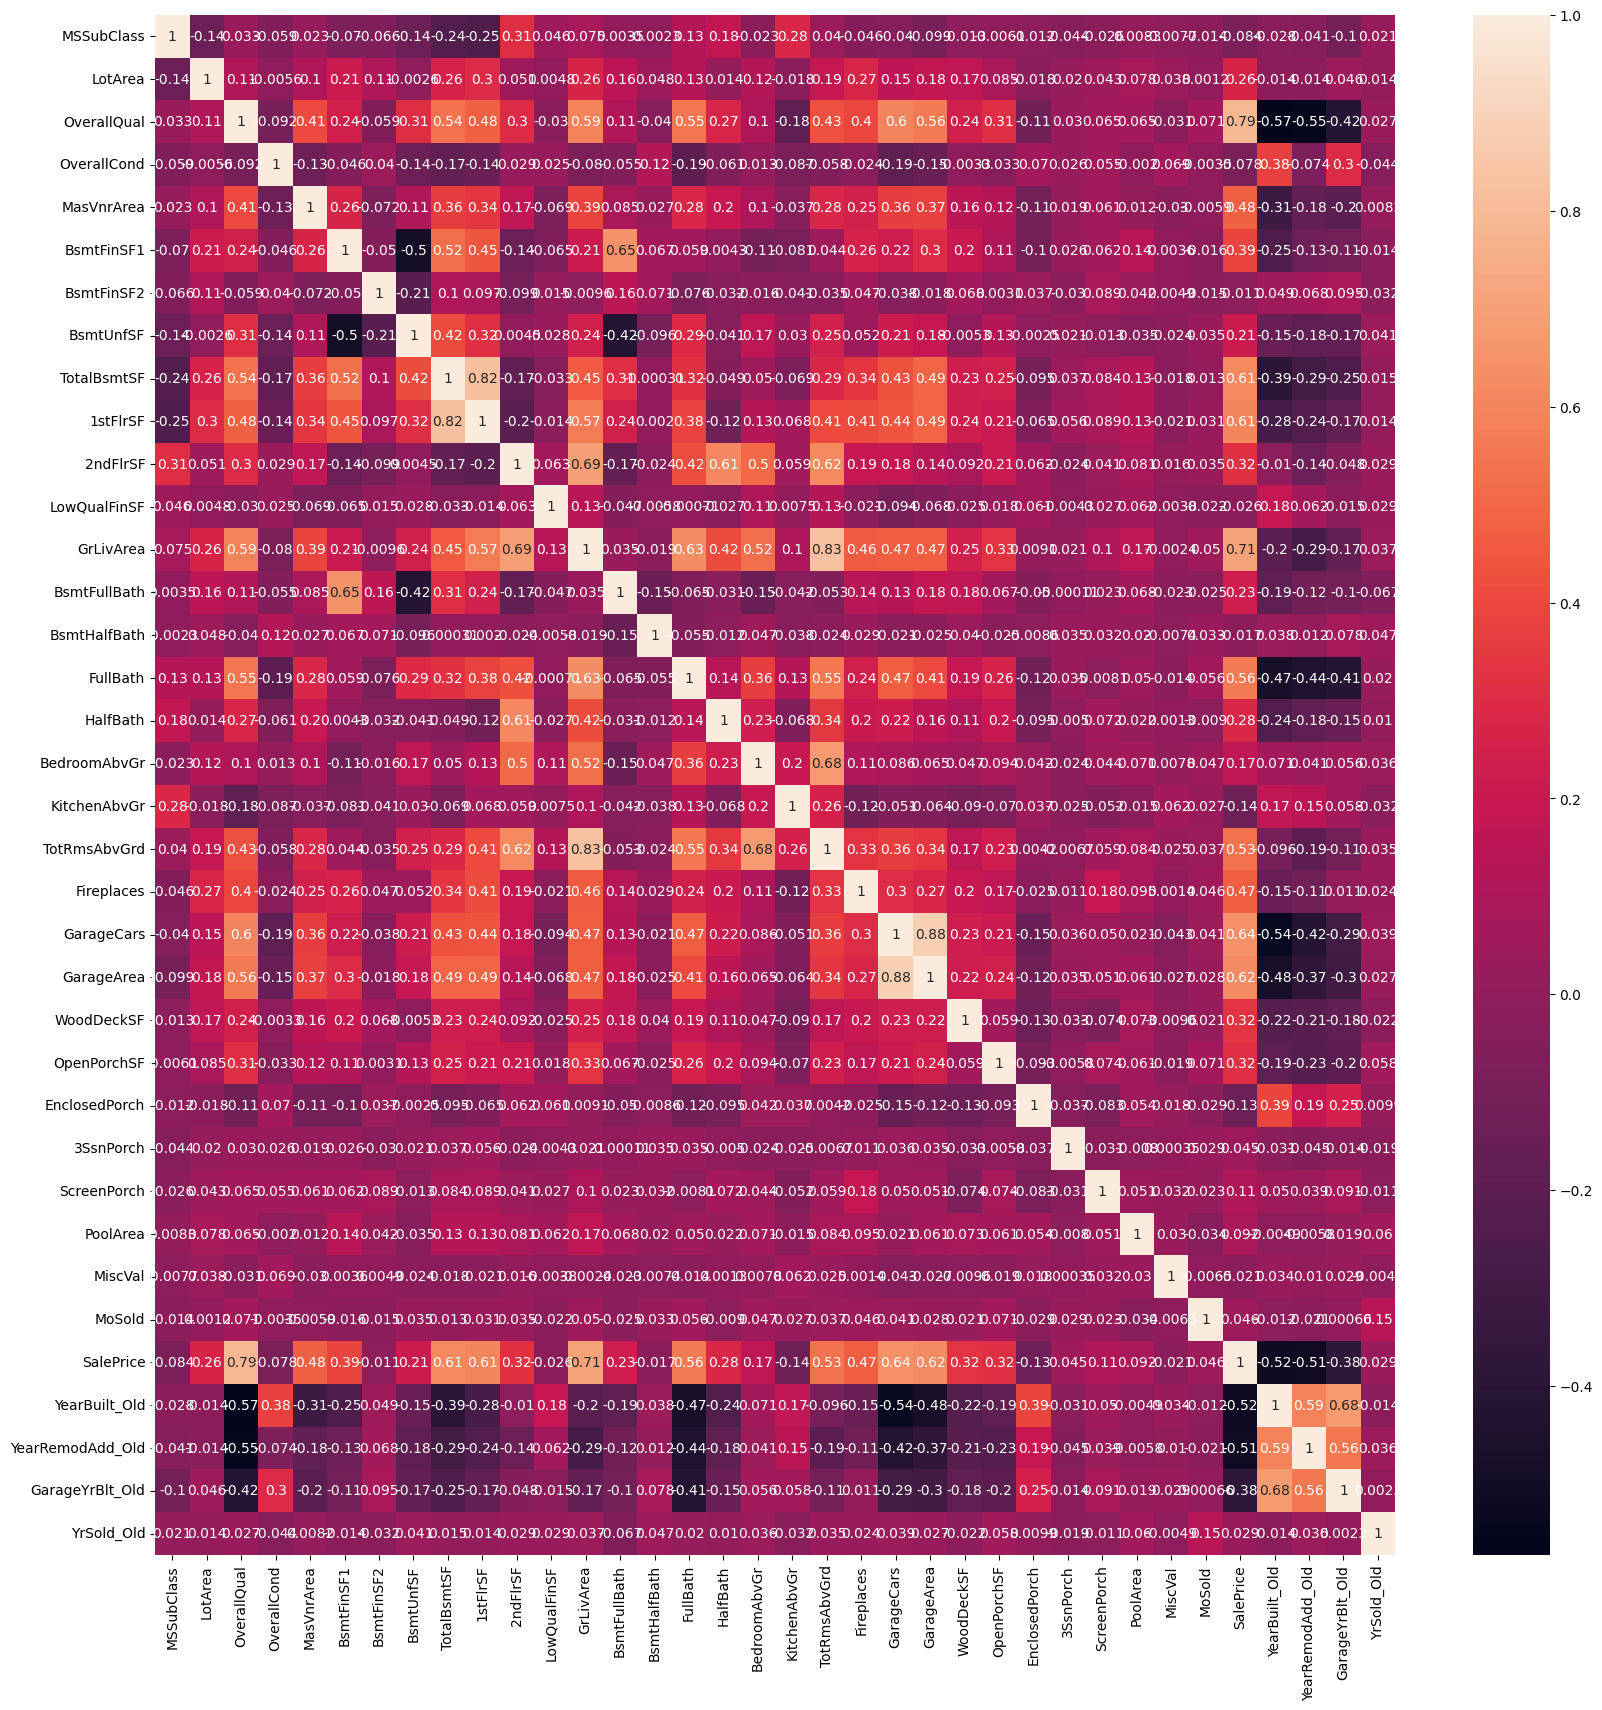

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(housing[list(housing.dtypes[housing.dtypes!='object'].index)].corr(),annot=True)
plt.show()

Checkig the outliers ad droig if ay 

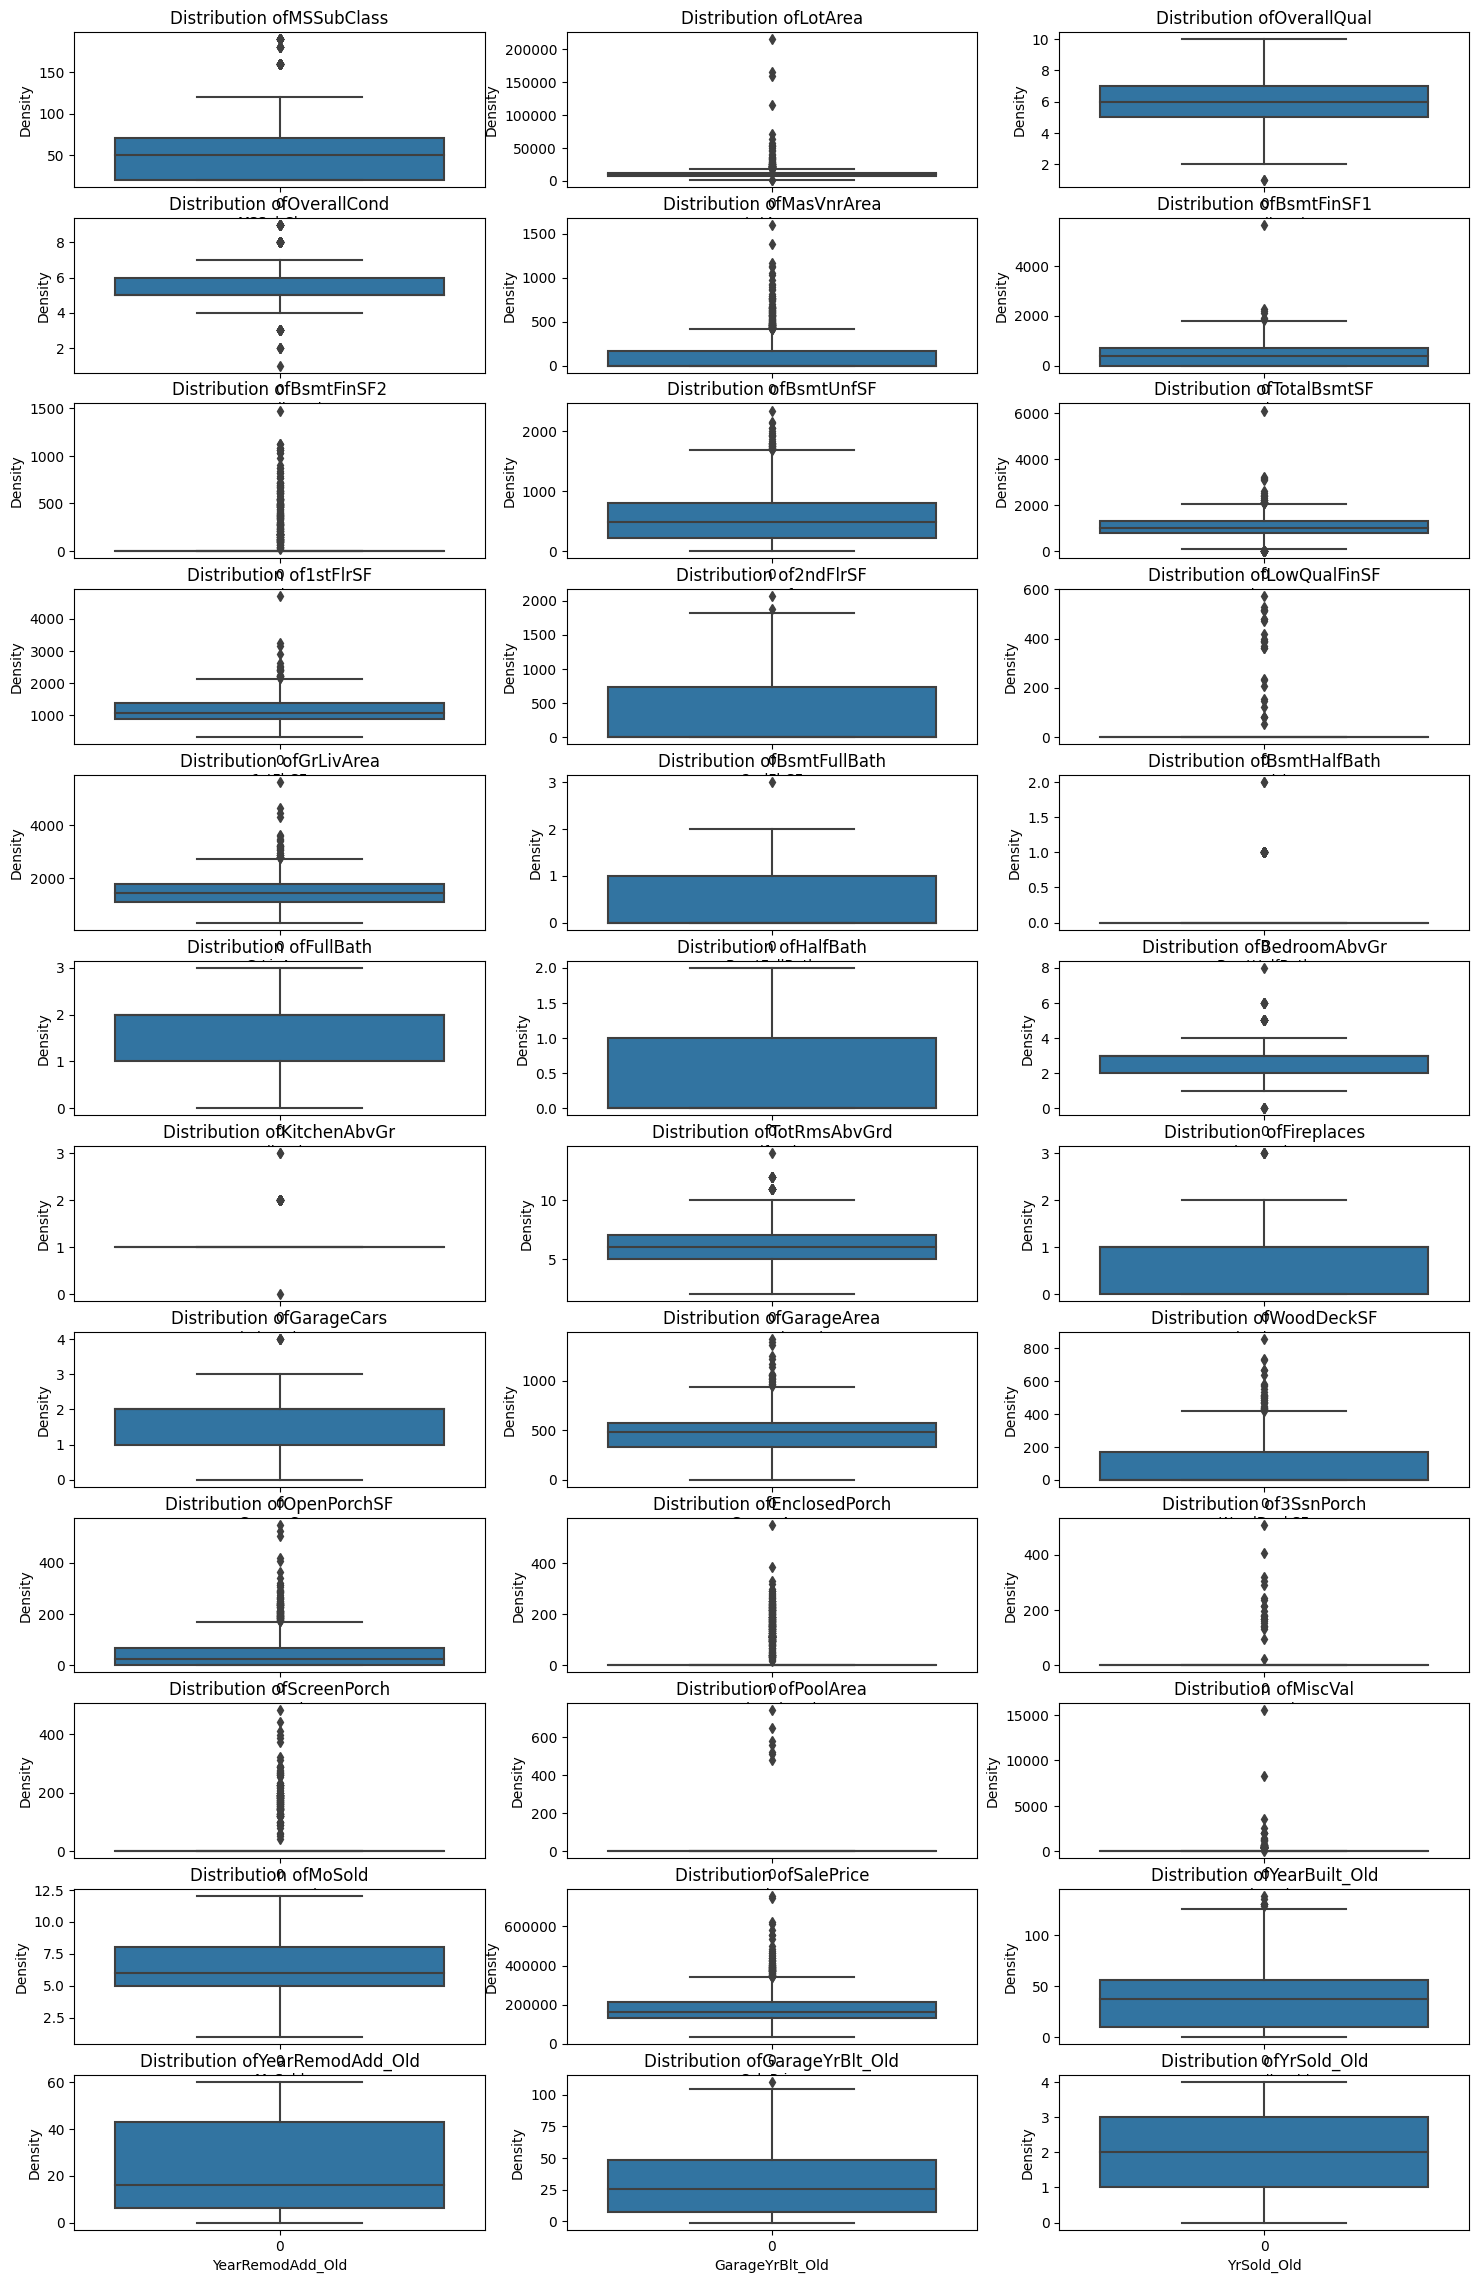

In [ ]:
#Continous_Variables = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'] plt.figure(figsize=(12,18)) 
#Continous_variables = list(housing.dtypes[housing.dtypes!='object'])
plt.figure(figsize=(18,25))
for i,v in enumerate(Continous_variables):
  plt.subplot(12,3,i+1)
  sns.boxplot(housing[v]) 
  plt.title('Distribution of'+v) 
  plt.xlabel(v) 
  plt.ylabel('Density') 
  plt.subplots_adjust(bottom=0.001) 
plt.show()

In [ ]:
#Remove the outliers
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
            
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing= drop_outliers(housing)

In [ ]:
housing.shape

(1441, 72)

In [ ]:
housing[list(housing.dtypes[housing.dtypes=='object'].index)].head()

MSZoning LotShape LandContour LotConfig LandSlope Neighborhood Condition1  \
0       RL      Reg         Lvl    Inside       Gtl      CollgCr       Norm   
1       RL      Reg         Lvl       FR2       Gtl      Veenker      Feedr   
2       RL      IR1         Lvl    Inside       Gtl      CollgCr       Norm   
3       RL      IR1         Lvl    Corner       Gtl      Crawfor       Norm   
4       RL      IR1         Lvl       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   
1       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd   
2       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   
3       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng   
4       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional GarageType GarageFinish GarageQual GarageCond  \
0          Gd        Typ     Attchd          RFn         TA         TA   
1          TA        Typ     Attchd          RFn         TA         TA   
2          Gd        Typ     Attchd          RFn         TA         TA   
3          Gd        Typ     Detchd          Unf         TA         TA   
4          Gd        Typ     Attchd          RFn         TA         TA   

  PavedDrive SaleType SaleCondition  
0          Y       WD        Normal  
1          Y       WD        Normal  
2          Y       WD        Normal  
3          Y       WD       Abnorml  
4          Y       WD        Normal

**Step 2 : Preparaing the data for modelling**

-Encoding:

-converting binary vars to 1/0

-other categorical variables to dummy variables

(coverting non numeric to numeric variables)

In [ ]:
housing['MSSubClass'] = housing.MSSubClass.map({20:'1-Story New',30:'1-Story Old',40:'1-Story finished',45:'1-1/2 Story Unfinished',
                                               50:'1-12 Story Finished',60:'2-Story 1946 New',70:'2-Story 1945 Old',75:'2-12 Story All Ages',80:'Split or Multi-Level',
                                               85:'Split Foyer',90:'Duplex - All Styles and Ages',120:'1-Story PUD&New',150:'1-1/2 Story PUD- AllAges',
                                               160:'2-Story PUD new',180:'PUD - MULTILEVEL',190:'2 Family Conversion - All Styles and Ages'})
housing['OverallCond'] = housing.OverallCond.map({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',
                                                  3:'Fair',2:'Poor',1:'Very Poor'})
housing['OverallQual'] = housing.OverallQual.map({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',
                                                  3:'Fair',2:'Poor',1:'Very Poor'})
housing['CentralAir']  = housing.CentralAir.map({'Y':1,'N':0})

In [ ]:
housing.MSSubClass.head()

0    2-Story 1946 New
1         1-Story New
2    2-Story 1946 New
3    2-Story 1945 Old
4    2-Story 1946 New
Name: MSSubClass, dtype: object

In [ ]:
print(cat_var)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
dummy_col = pd.get_dummies(housing[['MSSubClass','OverallCond','OverallQual','MSZoning','LotShape','LandContour',
                                    'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
             'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageQual','GarageFinish','GarageCond','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)


housing = pd.concat([housing,dummy_col],axis='columns')

housing = housing.drop(['MSSubClass','OverallCond','OverallQual','MSZoning','LotShape','LandContour',
                                    'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
             'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageQual','GarageFinish','GarageCond','PavedDrive','SaleType','SaleCondition'],axis ='columns')

Let us check distribution of our target variable

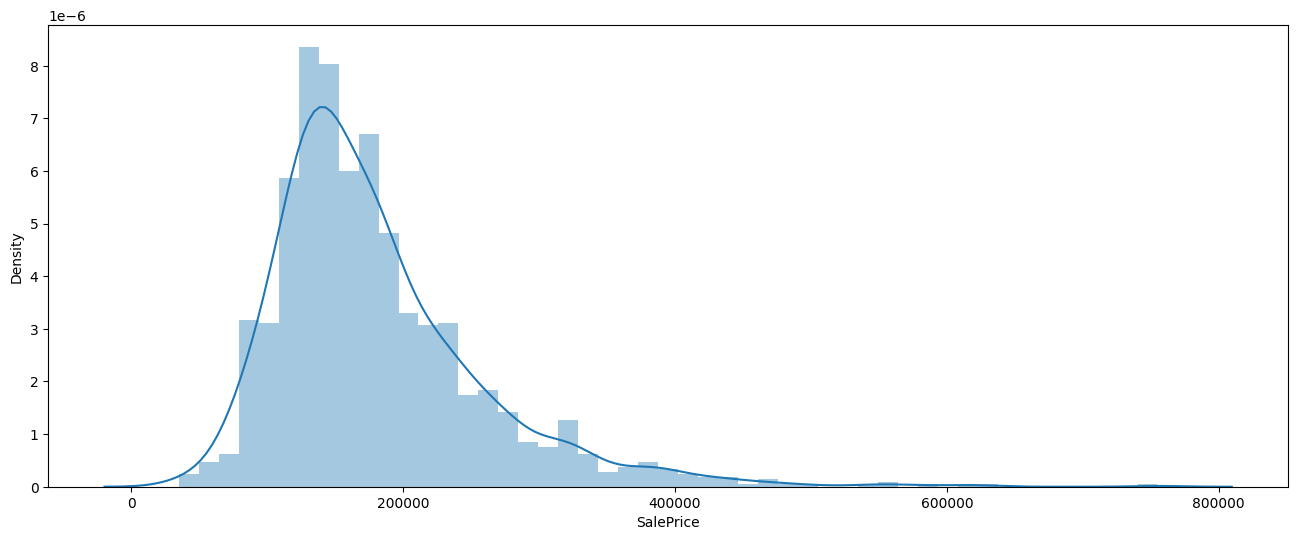

In [ ]:
#Checking target variables distribution
plt.figure(figsize=(16,6))
sns.distplot(housing.SalePrice)
plt.show()

**Training the model**

Split train and test data

In [ ]:
df_train,df_test = train_test_split(housing,train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
housing.head()

LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     8450       196.0         706           0        150          856   
1     9600         0.0         978           0        284         1262   
2    11250       162.0         486           0        434          920   
3     9550         0.0         216           0        540          756   
4    14260       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  YearBuilt_Old  \
0            0         0        0       2     208500              7   
1            0         0        0       5     181500             34   
2            0         0        0       9     223500              9   
3            0         0        0       2     140000             95   
4            0         0        0      12     250000             10   

   YearRemodAdd_Old  GarageYrBlt_Old  YrSold_Old  \
0                 7              7.0           2   
1                34             34.0           3   
2                 8              9.0           2   
3                40             12.0           4   
4                10             10.0           2   

   MSSubClass_1-12 Story Finished  MSSubClass_1-Story New  \
0                               0                       0   
1                               0                       1   
2                               0                       0   
3                               0                       0   
4                               0                       0   

   MSSubClass_1-Story Old  MSSubClass_1-Story PUD&New  \
0                       0                           0   
1                       0                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   MSSubClass_1-Story finished  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

   MSSubClass_2 Family Conversion - All Styles and Ages  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-12 Story All Ages  MSSubClass_2-Story 1945 Old  \
0                               0                        

In [ ]:
len(housing.columns)

255

In [ ]:
num_col = ['LotArea','MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']


scaler = MinMaxScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

Check distribution after scaling

<Axes: xlabel='SalePrice', ylabel='Density'>

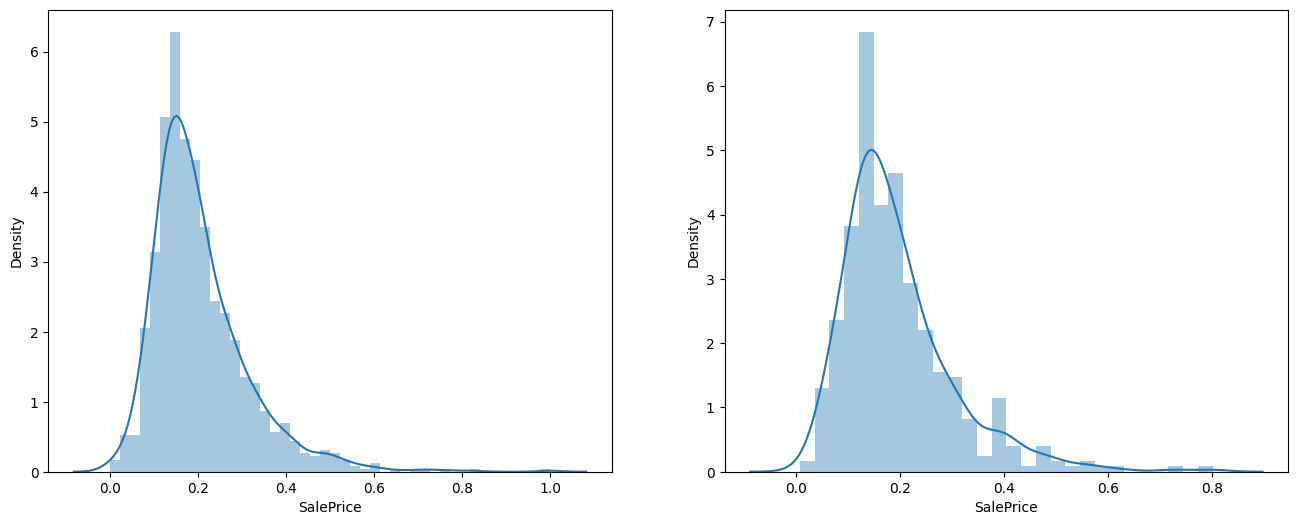

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

Splitting target variable

In [ ]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [ ]:
y_test = df_test.pop('SalePrice')
X_test = df_test

Using RFE to find Optimal number of features

In [ ]:
#Running RFE with the output number of variable equal to 10
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
rfe = RFE(estimator =lm,n_features_to_select = 50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

Displyaing RFE assigned ranking

In [ ]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [ ]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [ ]:
rfe_sel_columns

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'MSSubClass_1-Story finished',
 'MSSubClass_Duplex - All Styles and Ages',
 'OverallCond_Below Average',
 'OverallCond_Fair',
 'OverallCond_Poor',
 'OverallQual_Excellent',
 'OverallQual_Very Excellent',
 'OverallQual_Very Good',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Condition2_PosN',
 'RoofMatl_Membran',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_CBlock',
 'Exterior2nd_CBlock',
 'ExterCond_Gd',
 'ExterCond_TA',
 'Foundation_Slab',
 'BsmtCond_Po',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_Wall',
 'Electrical_Mix',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Sev',
 'SaleType_ConLI',
 'SaleType_New',
 'SaleCondition_Partial']

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 39),
 ('BsmtHalfBath', False, 131),
 ('FullBath', True, 1),
 ('HalfBath', False, 141),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 139),
 ('GarageCars', False, 166),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 43),
 ('OpenPorchSF', False, 165),
 ('EnclosedPorch', False, 102),
 ('3SsnPorch', False, 85),
 ('ScreenPorch', False, 5),
 ('PoolArea', False, 200),
 ('MiscVal', False, 180),
 ('MoSold', False, 187),
 ('YearBuilt_Old', False, 195),
 ('YearRemodAdd_Old', False, 198),
 ('GarageYrBlt_Old', False, 199),
 ('YrSold_Old', False, 181),
 ('MSSubClass_1-12 Story Finished', False, 24),
 ('MSSubClass_1-Story New', False, 17),
 ('MSSubClass_1-Story Old

Lets filter the train and test set for the RFE selected columns

In [ ]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

Building model using stats model for detailed statistics

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

In [ ]:
#running linear model
lm = sm.OLS(y_train,X_train).fit() 

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     194.1
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        09:49:44   Log-Likelihood:                 1993.0
No. Observations:                1008   AIC:                            -3890.
Df Residuals:                     960   BIC:                            -3654.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#To select the variables manually following are the rules used:-
#variables having high P > 0.05 value and high VIF > 5 remove these first 
#High p value and low VIF :- remove these 2nd
#Low p value and high VIF :- remove these last
#low p value and low VIF :- dont remove

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

features     VIF
34                       Exterior1st_CBlock     inf
35                       Exterior2nd_CBlock     inf
3                                BsmtFinSF1     inf
4                                BsmtFinSF2     inf
5                                 BsmtUnfSF     inf
6                               TotalBsmtSF     inf
7                                  1stFlrSF     inf
8                                  2ndFlrSF     inf
9                              LowQualFinSF     inf
10                                GrLivArea     inf
0                                     const  327.56
50                    SaleCondition_Partial   40.58
49                             SaleType_New   40.24
26                              MSZoning_RL   27.64
27                              MSZoning_RM   21.43
46                           KitchenQual_TA   10.60
45                           KitchenQual_Gd    8.84
24                              MSZoning_FV    8.05
37                             ExterCond_TA    6.45
36                             ExterCond_Gd    6.29
14                             TotRmsAbvGrd    5.55
43                           Electrical_Mix    2.72
12                             BedroomAbvGr    2.64
25                              MSZoning_RH    2.63
13                             KitchenAbvGr    2.47
17  MSSubClass_Duplex - All Styles and Ages    2.31
44                           KitchenQual_Fa    2.26
39                              BsmtCond_Po    2.22
11                                 FullBath    2.22
15                               GarageArea    2.06
22               OverallQual_Very Excellent    1.98
38                          Foundation_Slab    1.94
21                    OverallQual_Excellent    1.86
20                         OverallCond_Poor    1.81
1                                   LotArea    1.63
23                    OverallQual_Very Good    1.61
2                                MasVnrArea    1.60
29                     Neighborhood_NoRidge    1.41
32                         RoofMatl_WdShngl    1.40
30                          Condition2_PosN    1.32
42                             Heating_Wall    1.27
18                OverallCond_Below Average    1.17
19                         OverallCond_Fair    1.15
28                     Neighborhood_Crawfor    1.12
40                             Heating_GasW    1.11
33                      Exterior1st_AsphShn    1.10
41                             Heating_Grav    1.08
31                         RoofMatl_Membran    1.08
16              MSSubClass_1-Story finished    1.04
47                           Functional_Sev    1.04
48                           SaleType_ConLI    1.03

In [ ]:
X_train = X_train.drop(['Exterior1st_CBlock','Exterior2nd_CBlock','LowQualFinSF'],axis = 1)

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        09:49:45   Log-Likelihood:                 1991.7
No. Observations:                1008   AIC:                            -3889.
Df Residuals:                     961   BIC:                            -3658.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

features     VIF
3                                BsmtFinSF1     inf
4                                BsmtFinSF2     inf
5                                 BsmtUnfSF     inf
6                               TotalBsmtSF     inf
0                                     const  327.54
9                                 GrLivArea  128.79
8                                  2ndFlrSF   94.68
7                                  1stFlrSF   70.51
47                    SaleCondition_Partial   40.58
46                             SaleType_New   40.24
25                              MSZoning_RL   27.63
26                              MSZoning_RM   21.43
43                           KitchenQual_TA   10.60
42                           KitchenQual_Gd    8.84
23                              MSZoning_FV    8.05
34                             ExterCond_TA    6.45
33                             ExterCond_Gd    6.29
13                             TotRmsAbvGrd    5.55
40                           Electrical_Mix    2.72
24                              MSZoning_RH    2.63
11                             BedroomAbvGr    2.63
12                             KitchenAbvGr    2.47
16  MSSubClass_Duplex - All Styles and Ages    2.31
41                           KitchenQual_Fa    2.26
36                              BsmtCond_Po    2.22
10                                 FullBath    2.21
14                               GarageArea    2.06
21               OverallQual_Very Excellent    1.98
35                          Foundation_Slab    1.94
20                    OverallQual_Excellent    1.86
19                         OverallCond_Poor    1.81
1                                   LotArea    1.63
22                    OverallQual_Very Good    1.61
2                                MasVnrArea    1.60
28                     Neighborhood_NoRidge    1.41
31                         RoofMatl_WdShngl    1.40
29                          Condition2_PosN    1.32
39                             Heating_Wall    1.27
17                OverallCond_Below Average    1.17
18                         OverallCond_Fair    1.15
27                     Neighborhood_Crawfor    1.12
37                             Heating_GasW    1.11
32                      Exterior1st_AsphShn    1.10
30                         RoofMatl_Membran    1.08
38                             Heating_Grav    1.08
44                           Functional_Sev    1.04
15              MSSubClass_1-Story finished    1.04
45                           SaleType_ConLI    1.03

In [ ]:
X_train = X_train.drop(['GrLivArea','1stFlrSF','MSZoning_RM','ExterCond_TA','ExterCond_Gd'],axis = 1)

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     210.6
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        09:49:45   Log-Likelihood:                 1965.1
No. Observations:                1008   AIC:                            -3846.
Df Residuals:                     966   BIC:                            -3640.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

features     VIF
5                                 BsmtUnfSF     inf
6                               TotalBsmtSF     inf
3                                BsmtFinSF1     inf
4                                BsmtFinSF2     inf
0                                     const  110.33
42                    SaleCondition_Partial   40.57
41                             SaleType_New   40.23
38                           KitchenQual_TA   10.55
37                           KitchenQual_Gd    8.81
11                             TotRmsAbvGrd    4.24
7                                  2ndFlrSF    3.42
35                           Electrical_Mix    2.65
9                              BedroomAbvGr    2.56
10                             KitchenAbvGr    2.46
14  MSSubClass_Duplex - All Styles and Ages    2.29
36                           KitchenQual_Fa    2.23
8                                  FullBath    2.13
31                              BsmtCond_Po    2.12
12                               GarageArea    2.01
19               OverallQual_Very Excellent    1.96
18                    OverallQual_Excellent    1.85
30                          Foundation_Slab    1.72
23                              MSZoning_RL    1.69
20                    OverallQual_Very Good    1.60
17                         OverallCond_Poor    1.60
1                                   LotArea    1.59
2                                MasVnrArea    1.58
21                              MSZoning_FV    1.47
25                     Neighborhood_NoRidge    1.39
28                         RoofMatl_WdShngl    1.34
26                          Condition2_PosN    1.31
34                             Heating_Wall    1.25
15                OverallCond_Below Average    1.13
16                         OverallCond_Fair    1.12
22                              MSZoning_RH    1.11
32                             Heating_GasW    1.09
24                     Neighborhood_Crawfor    1.08
29                      Exterior1st_AsphShn    1.07
27                         RoofMatl_Membran    1.07
33                             Heating_Grav    1.07
39                           Functional_Sev    1.03
40                           SaleType_ConLI    1.02
13              MSSubClass_1-Story finished    1.02

In [ ]:
#Dropping columns with high p values
X_train = X_train.drop(['MSSubClass_1-Story finished','MSSubClass_Duplex - All Styles and Ages','OverallCond_Poor','MSZoning_RH','RoofMatl_Membran','Exterior1st_AsphShn','BsmtCond_Po','Heating_GasW','Heating_Grav','Heating_Wall','Electrical_Mix','SaleType_ConLI'],axis = 1)

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     293.3
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        09:49:46   Log-Likelihood:                 1952.8
No. Observations:                1008   AIC:                            -3846.
Df Residuals:                     978   BIC:                            -3698.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

features    VIF
5                    BsmtUnfSF    inf
6                  TotalBsmtSF    inf
3                   BsmtFinSF1    inf
4                   BsmtFinSF2    inf
0                        const  83.93
30       SaleCondition_Partial  40.55
29                SaleType_New  40.20
27              KitchenQual_TA  10.52
26              KitchenQual_Gd   8.79
11                TotRmsAbvGrd   4.15
7                     2ndFlrSF   3.27
9                 BedroomAbvGr   2.43
25              KitchenQual_Fa   2.08
8                     FullBath   2.07
12                  GarageArea   1.97
16  OverallQual_Very Excellent   1.96
15       OverallQual_Excellent   1.84
17       OverallQual_Very Good   1.59
19                 MSZoning_RL   1.58
2                   MasVnrArea   1.56
24             Foundation_Slab   1.53
1                      LotArea   1.52
18                 MSZoning_FV   1.45
10                KitchenAbvGr   1.39
21        Neighborhood_NoRidge   1.38
23            RoofMatl_WdShngl   1.33
22             Condition2_PosN   1.31
14            OverallCond_Fair   1.10
13   OverallCond_Below Average   1.09
20        Neighborhood_Crawfor   1.07
28              Functional_Sev   1.03

In [ ]:
#Dropping features with high vif
X_train = X_train.drop(['BsmtUnfSF','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','SaleCondition_Partial','SaleType_New','KitchenQual_TA','KitchenQual_Gd'],axis = 1)

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     224.6
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        09:49:46   Log-Likelihood:                 1712.3
No. Observations:                1008   AIC:                            -3379.
Df Residuals:                     985   BIC:                            -3265.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

features    VIF
0                        const  42.08
7                 TotRmsAbvGrd   3.89
5                 BedroomAbvGr   2.31
3                     2ndFlrSF   2.17
8                   GarageArea   1.81
4                     FullBath   1.77
12  OverallQual_Very Excellent   1.59
15                 MSZoning_RL   1.55
2                   MasVnrArea   1.50
1                      LotArea   1.46
13       OverallQual_Very Good   1.41
14                 MSZoning_FV   1.38
6                 KitchenAbvGr   1.33
17        Neighborhood_NoRidge   1.31
19            RoofMatl_WdShngl   1.31
18             Condition2_PosN   1.29
11       OverallQual_Excellent   1.28
20             Foundation_Slab   1.14
10            OverallCond_Fair   1.09
9    OverallCond_Below Average   1.07
16        Neighborhood_Crawfor   1.06
21              KitchenQual_Fa   1.06
22              Functional_Sev   1.01

In [ ]:
y_train_cnt = lm.predict(X_train)

<Figure size 640x480 with 0 Axes>

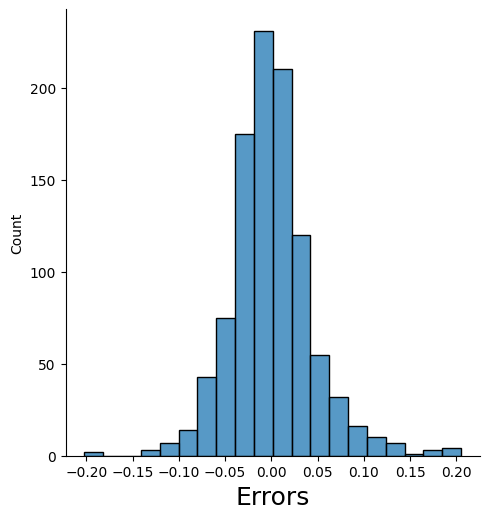

In [ ]:
fig = plt.figure()
#RS = y_train_sk - y_train_cnt
sns.displot((y_train - y_train_cnt),bins = 20)
#sns.displot(RS)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel('Errors',fontsize = 18)
plt.show()

In [ ]:
X_test_new = X_test.drop(['Exterior1st_CBlock','Exterior2nd_CBlock','LowQualFinSF','GrLivArea','1stFlrSF','MSZoning_RM','ExterCond_TA','ExterCond_Gd','MSSubClass_1-Story finished','MSSubClass_Duplex - All Styles and Ages','OverallCond_Poor','MSZoning_RH','RoofMatl_Membran','Exterior1st_AsphShn','BsmtCond_Po','Heating_GasW','Heating_Grav','Heating_Wall','Electrical_Mix','SaleType_ConLI','BsmtUnfSF','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','SaleCondition_Partial','SaleType_New','KitchenQual_TA','KitchenQual_Gd'],axis = 1)
X_test_new.columns

Index(['LotArea', 'MasVnrArea', '2ndFlrSF', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea',
       'OverallCond_Below Average', 'OverallCond_Fair',
       'OverallQual_Excellent', 'OverallQual_Very Excellent',
       'OverallQual_Very Good', 'MSZoning_FV', 'MSZoning_RL',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Condition2_PosN',
       'RoofMatl_WdShngl', 'Foundation_Slab', 'KitchenQual_Fa',
       'Functional_Sev'],
      dtype='object')

In [ ]:
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

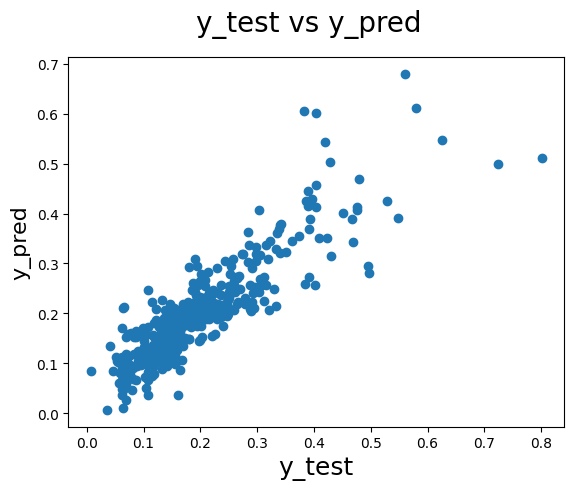

In [ ]:
fig = plt.figure()
plt.scatter(y_test , y_pred)
fig.suptitle('y_test vs y_pred',fontsize = 20)
plt.xlabel('y_test',fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)
plt.show()

In [ ]:
r2_score(y_true = y_test,y_pred = y_pred)

0.768806043585051

In [ ]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test_new)
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.8338015074583123
0.768806043585051


Above R2 scores differences shows clearly the sign of overfitting

Try Lasso Regression to overcome overfitting issue

In [ ]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test_new)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7591678351405983
0.7332856473927389


In [ ]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('const', 0.023),
 ('LotArea', 0.0),
 ('MasVnrArea', 0.039),
 ('2ndFlrSF', 0.05),
 ('FullBath', 0.049),
 ('BedroomAbvGr', 0.097),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', -0.0),
 ('GarageArea', 0.03),
 ('OverallCond_Below Average', 0.18),
 ('OverallCond_Fair', -0.016),
 ('OverallQual_Excellent', -0.0),
 ('OverallQual_Very Excellent', 0.15),
 ('OverallQual_Very Good', 0.195),
 ('MSZoning_FV', 0.08),
 ('MSZoning_RL', 0.004),
 ('Neighborhood_Crawfor', 0.027),
 ('Neighborhood_NoRidge', 0.023),
 ('Condition2_PosN', 0.036),
 ('RoofMatl_WdShngl', -0.0),
 ('Foundation_Slab', 0.0),
 ('KitchenQual_Fa', -0.018),
 ('Functional_Sev', -0.0)]

In [ ]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.011598      0.001515         0.003046        0.000609        0.001   
1       0.010372      0.007679         0.004196        0.003320        0.010   
2       0.010912      0.001040         0.003086        0.000752        0.100   
3       0.008765      0.002361         0.003234        0.000941        1.000   
4       0.008237      0.003391         0.004450        0.002492        5.000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.675129           0.763526           0.721791   
1   {'alpha': 0.01}           0.182410           0.135531           0.071378   
2    {'alpha': 0.1}          -0.006496          -0.021566          -0.018063   
3    {'alpha': 1.0}          -0.006496          -0.021566          -0.018063   
4    {'alpha': 5.0}          -0.006496          -0.021566          -0.018063   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.767916           0.714910           0.798655           0.744947   
1           0.079098           0.200544           0.139231           0.127550   
2          -0.001154          -0.000764          -0.003163          -0.007068   
3          -0.001154          -0.000764          -0.003163          -0.007068   
4          -0.001154          -0.000764          -0.003163          -0.007068   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.527496           0.744144           0.842756         0.730127   
1           0.112030           0.185859           0.146230         0.137986   
2          -0.037754          -0.004667          -0.014282        -0.011498   
3          -0.037754          -0.004667          -0.014282        -0.011498   
4          -0.037754          -0.004667          -0.014282        -0.011498   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.080452                1            0.764740            0.756737   
1        0.041160                2            0.164321            0.139430   
2        0.011066                3            0.000000            0.000000   
3        0.011066                3            0.000000            0.000000   
4        0.011066                3            0.000000            0.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.749006            0.755278            0.765015   
1            0.153829            0.156765            0.126014   
2            0.000000            0.000000            0.000000   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.752397            0.754584            0.784968   
1            0.146648            0.136425            0.163300   
2            0.000000            0.000000            0.000000   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.759309            0.753516          0.759555         0.009760  
1            0.142715            0.138544          0.146799         0.011861  
2            0.000000            0.000000          0.000000         0.000000  
3            0.000000            0.000000          0.000000         0.000000  
4            0.000000            0.000000          0.000000         0.000000

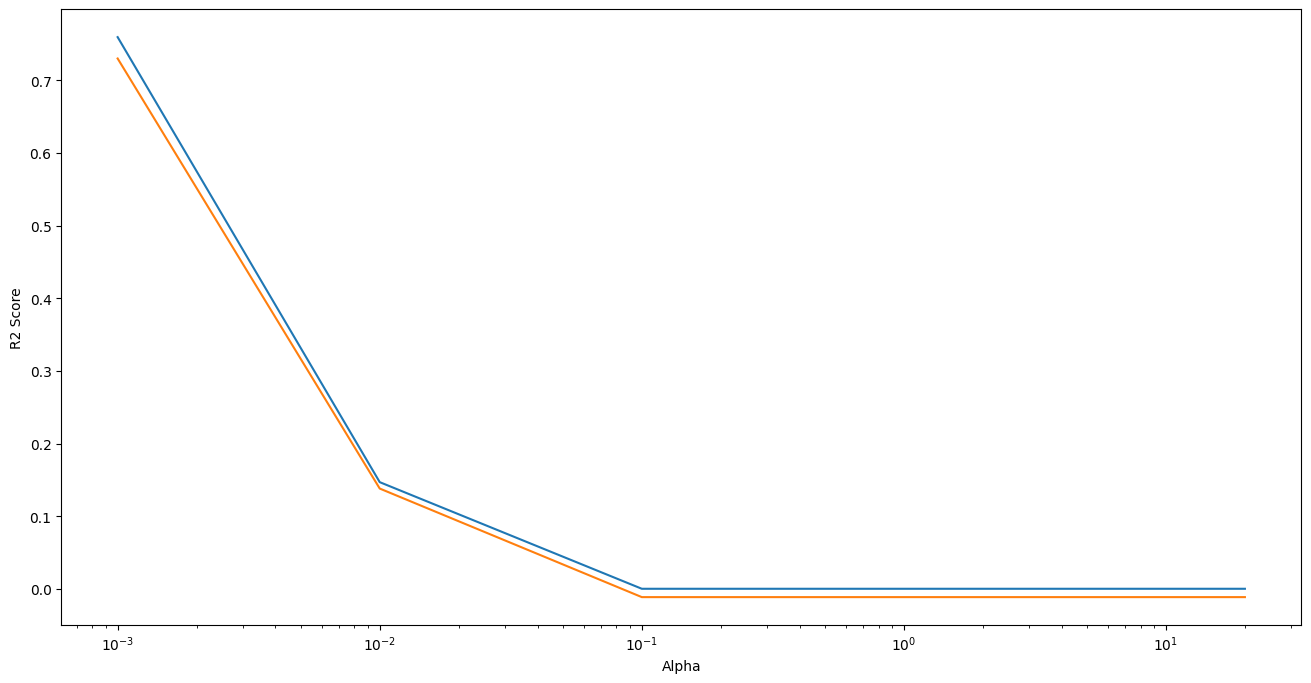

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [ ]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test_new)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7591678351405983
0.7332856473927389


In [ ]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [ ]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere      Coef
13       OverallQual_Very Good  0.195377
9    OverallCond_Below Average  0.179924
12  OverallQual_Very Excellent  0.149853
5                 BedroomAbvGr  0.097498
14                 MSZoning_FV  0.079782
3                     2ndFlrSF  0.050175
4                     FullBath  0.049321
2                   MasVnrArea  0.039388
18             Condition2_PosN  0.035618
8                   GarageArea  0.030274

Now lets use ridge regression

As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

In [ ]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test_new)
print(r2_score(y_test,y_test_pred))

0.833801494951723
0.7688253729115909


Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [ ]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.005277      0.003159         0.003708        0.001553        0.001   
1       0.004220      0.000264         0.002895        0.000888        0.010   
2       0.004641      0.001237         0.002728        0.000485        0.100   
3       0.004122      0.000096         0.002637        0.000110        0.200   
4       0.004049      0.000120         0.002558        0.000154        0.500   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.734841           0.830681           0.744992   
1   {'alpha': 0.01}           0.734885           0.831126           0.747479   
2    {'alpha': 0.1}           0.735278           0.835071           0.767987   
3    {'alpha': 0.2}           0.735628           0.838552           0.783895   
4    {'alpha': 0.5}           0.736303           0.845114           0.808781   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.856261           0.773358           0.880140           0.824221   
1           0.856219           0.773313           0.880122           0.824080   
2           0.855644           0.772879           0.879869           0.822709   
3           0.854756           0.772422           0.879469           0.821258   
4           0.851233           0.771147           0.877859           0.817294   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.586629           0.818259           0.855884         0.790526   
1           0.585409           0.818230           0.856115         0.790698   
2           0.574619           0.817978           0.858206         0.792024   
3           0.565137           0.817760           0.860142         0.792902   
4           0.547241           0.817343           0.864282         0.793660   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.081965                7            0.840654            0.832369   
1        0.082161                6            0.840653            0.832367   
2        0.084286                5            0.840544            0.832207   
3        0.086605                3            0.840259            0.831799   
4        0.091600                1            0.838808            0.829811   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.837406            0.830745            0.839462   
1            0.837402            0.830743            0.839461   
2            0.837028            0.830609            0.839343   
3            0.836164            0.830265            0.839037   
4            0.832622            0.828589            0.837499   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.828192            0.834058            0.843169   
1            0.828191            0.834056            0.843168   
2            0.828063            0.833936            0.843105   
3            0.827734            0.833627            0.842946   
4            0.826108            0.832082            0.842159   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.834558            0.831062          0.835168         0.004605  
1            0.834557            0.831061          0.835166         0.004605  
2            0.834441            0.830925          0.835020         0.004611  
3            0.834141            0.830577          0.834655         0.004636  
4            0.832629            0.828855          0.832916         0.004829

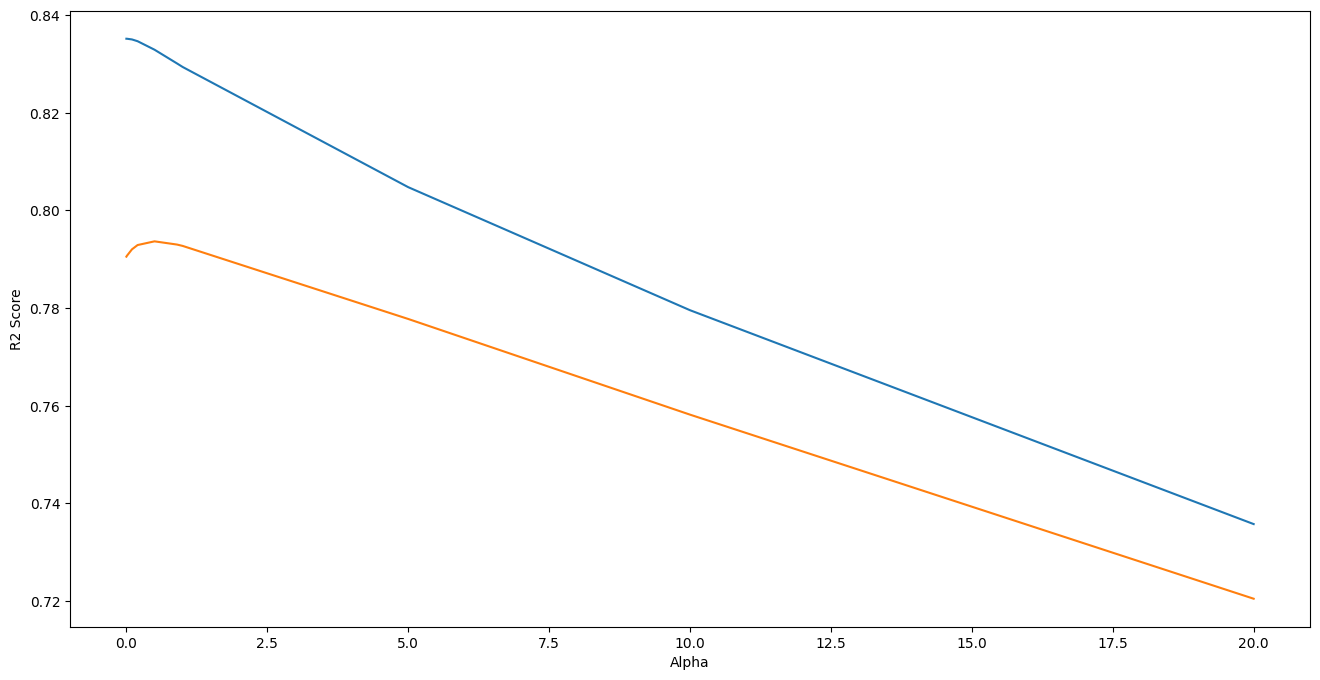

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [ ]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.5}

In [ ]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test_new)
print(r2_score(y_test,y_pred_test))

0.8319972544585374
0.7748298422725561


In [ ]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [ ]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
13       OverallQual_Very Good  0.261484
12  OverallQual_Very Excellent  0.154912
8                   GarageArea  0.149340
9    OverallCond_Below Average  0.143766
2                   MasVnrArea  0.136203
5                 BedroomAbvGr  0.107069
3                     2ndFlrSF  0.088602
20             Foundation_Slab  0.087013
14                 MSZoning_FV  0.072944
0                        const  0.064114

Doubling the alpha value to answer the part 2 questions

In [ ]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test_new)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.6954202932838321
0.6726724711540444


In [ ]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [ ]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere      Coef
13       OverallQual_Very Good  0.195377
9    OverallCond_Below Average  0.179924
12  OverallQual_Very Excellent  0.149853
5                 BedroomAbvGr  0.097498
14                 MSZoning_FV  0.079782
3                     2ndFlrSF  0.050175
4                     FullBath  0.049321
2                   MasVnrArea  0.039388
18             Condition2_PosN  0.035618
8                   GarageArea  0.030274

In [ ]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test_new)
print(r2_score(y_test,y_pred_test))

0.8289546160587621
0.7770769428322206


In [ ]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [ ]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
13       OverallQual_Very Good  0.243244
12  OverallQual_Very Excellent  0.154093
9    OverallCond_Below Average  0.144902
8                   GarageArea  0.139161
2                   MasVnrArea  0.126968
5                 BedroomAbvGr  0.105993
20             Foundation_Slab  0.090045
3                     2ndFlrSF  0.088031
14                 MSZoning_FV  0.073373
0                        const  0.059772

Removing the top features to answer the questions from part 2 of the assignment

In [ ]:
X_train_new = X_train.drop(['OverallQual_Very Good','OverallQual_Very Excellent','OverallCond_Below Average','GarageArea','MasVnrArea'],axis = 1)
X_train_new.columns

Index(['const', 'LotArea', '2ndFlrSF', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'OverallCond_Fair',
       'OverallQual_Excellent', 'MSZoning_FV', 'MSZoning_RL',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Condition2_PosN',
       'RoofMatl_WdShngl', 'Foundation_Slab', 'KitchenQual_Fa',
       'Functional_Sev'],
      dtype='object')

In [ ]:
X_test_new1 = X_test_new.drop(['OverallQual_Very Good','OverallQual_Very Excellent','OverallCond_Below Average','GarageArea','MasVnrArea'],axis = 1)

In [ ]:
X_test_new1.columns

Index(['const', 'LotArea', '2ndFlrSF', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'OverallCond_Fair',
       'OverallQual_Excellent', 'MSZoning_FV', 'MSZoning_RL',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Condition2_PosN',
       'RoofMatl_WdShngl', 'Foundation_Slab', 'KitchenQual_Fa',
       'Functional_Sev'],
      dtype='object')

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new1)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.5982642382163825
0.6367287869485707


In [ ]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feaure','Coef']

In [ ]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
7       OverallCond_Fair  0.183095
4           BedroomAbvGr  0.181833
9            MSZoning_FV  0.144878
2               2ndFlrSF  0.116956
13       Condition2_PosN  0.106686
0                  const  0.045275
10           MSZoning_RL  0.034897
11  Neighborhood_Crawfor  0.034331
12  Neighborhood_NoRidge  0.011475
15       Foundation_Slab  0.009643